In [2205]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("hotel_booking.csv")

In [2206]:
print(len(df.columns))
print(df.columns)

36
Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')


Target variable
is_canceled: binary variable and 1 represents booking was cancelled, 0 represents booking was honored 

Predictor variables

lead_time: numeric variable to represent the number of days that elapsed between the entering date of the booking into the PMS and the arrival date

arrival_date_year: categorical variable that represents the year of arrival date

arrival_date_month: categorical variable that represents the month of arrival date

arrival_date_week: numeric variable that represents the week of arrival date (W1 to W53)

arrival_date_day_month: numeric variable that represents the day of the month of the arrival date (1 to 31)

stays_in_weekend_nights: numeric variable that represents the number of weekend nights that the guest stayed or booked to stay at the hotel

stays_in_week_nights: numeric variable that represents the number of the week nights that the guest stayed or booked to stay at the hotel 

adults: numeric variable that represents the number of adult guests

children: numeric variable that represents the number of child guests

babies: numeric variable that represents the number of baby guests

meal: categorical variable that represents the type of meal booked

country: categorical variable that represents the country of origin of the guest

market_segment: categorical variable that represents the marget segment designation

distribution channel: categorical variable that represents the booking distribution channel 

is_repeated_guest: binary variable that represents whether the booking was made by a repeated guest or not

previous_cancellations: numeric variable that represents the number of previous bookings that were cancelled by the customer prior to the current booking 

previous_booking_cancellations: numeric variable that represents the number of booking not cancelled by the customer prior to the current booking 

reserved_room_type: categorical variable that represents the code of the room type reserved

assigned_room_type: categorical variable that represents the room type assigned to the booking. Sometimes the assigned room type differs from the reserved room type due 

booking_changes: categorical variable that represents the type of deposit made ("No Deposit", "No refund", "Refundable")

agent: categorical variable that represents the ID of the travel agency that made the booking

company: numeric variable that represents the ID of the company of entity that made the booking or responsible for paying the booking 

days_in_waiting_line: numeric variable that represents the booking was in the waiting list before it was confirmed to the customer

customer_type: categorical variable that represents whether the booking is associated to a group or transient (not part of a group or contract)

adr: numeric variable that represents the average daily rate (calculated by dividing the sum of all lodging transactions by the total number of staying nights)

required_car_parking: numeric variable that represents the number of car parking spaces required by the customer

total_of_special_requests: numeric variable that represents the number of special requests made by the customer 

reservation_status: categorical variable that represents the status of the reservation

reservation_status_date: date variable that represents the date of latest update to reservation status

Personally Identifiable Information

NOTE Dummy values were used for the below columns 

name: text variable that represents the name of the person 

email: text variable that represents the email of the person 

phone-number: text variable that represents the phone_number of the person 

credit_card: text variable that represents the credit_card of the person 

# Data Preprocessing

In [2207]:
df[['name', 'email', 'phone-number', 'credit_card']].isnull().sum()

name            0
email           0
phone-number    0
credit_card     0
dtype: int64

In this dataset, PII features store dummy values for privacy reasons. They are not especially useful for prediction and can be dropped. 

In [2208]:
df = df.drop(['name', 'email', 'phone-number', 'credit_card'], axis=1)
df.columns

print(len(df.columns))
hotel_type = df['hotel'].unique()
print(hotel_type)
#df = df[df['hotel'] == hotel_type[1]]

print(df['hotel'].value_counts())

32
['Resort Hotel' 'City Hotel']
City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64


In [2209]:
nullp_info = (df.isna().sum())/len(df) * 100
print(nullp_info)

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

In [2210]:
df = df.drop(["company"], axis=1)
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [2211]:
# impute missing data for agent field with mode value

# can we impute with a new value - no agent?? 

agent_id = df['agent'].unique()
agentid_countp = df['agent'].value_counts()/len(df)*100
mode_agentid = agentid_countp.idxmax()

df['agent'] = df['agent'].fillna(mode_agentid)
df['agent'].isna().sum()

0

In [2212]:
# impute missing data for country field with mode value

country = df['country'].unique()
country_countp = df['country'].value_counts()/len(df)*100
mode_country = country_countp.idxmax()

df['country'] = df['country'].fillna(mode_country)
df['country'].isna().sum()

0

In [2213]:
# impute missing data for country field with 0 

# BEST TO DROP THESE INSTANCES INSTEAD???????

children = df['children'].unique()
children

df.dropna(axis=0, inplace=True, subset=['children'])

In [2214]:
# Create two new columns for the month_number and the arrival_date in datetime format

month_order = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
df['arrival_date_month_#'] = df['arrival_date_month'].replace(month_order)
df['arrival_date'] = pd.to_datetime(dict(year=df['arrival_date_year'], month=df['arrival_date_month_#'], day=df['arrival_date_day_of_month']))
df.columns

# Modify column reservation_status_date to a datetime type from str type

print(type(df['reservation_status_date'][0]))
df['reservation_status_date_new'] = pd.to_datetime(df['reservation_status_date'], format='%Y-%m-%d')
print(type(df['reservation_status_date_new'][0]))

df['diff_reservation_arrival'] = df['arrival_date'] - df['reservation_status_date_new']
df['diff_reservation_arrival_int'] = df['diff_reservation_arrival'].dt.days

<class 'str'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [2215]:
hotel_type = df['hotel'].unique()
print(hotel_type)
#df = df[df['hotel'] == hotel_type[1]]

print(df['hotel'].value_counts())

['Resort Hotel' 'City Hotel']
City Hotel      79326
Resort Hotel    40060
Name: hotel, dtype: int64


In [2216]:
df_hotel = df[df['hotel'] == hotel_type[1]]

print(len(df_hotel))

79326


In [2217]:
categorical_features = ["arrival_date_year", "arrival_date_month", "arrival_date_week_number", "arrival_date_day_of_month", "meal", "is_repeated_guest", "country", "market_segment", "distribution_channel", "reserved_room_type", "assigned_room_type", "deposit_type", "agent", "customer_type", "reservation_status"]
print(len(categorical_features))

print("\tSummary of categorical variables\n")

for c in categorical_features:
    #print(c,"\t", len(df_hotel[c].unique()),"\t", df_hotel[c].value_counts().idxmax())
    print(c, "has",len(df_hotel[c].unique()),"unique values and",df_hotel[c].value_counts().idxmax(),"has highest frequency")

15
	Summary of categorical variables

arrival_date_year has 3 unique values and 2016 has highest frequency
arrival_date_month has 12 unique values and August has highest frequency
arrival_date_week_number has 53 unique values and 33 has highest frequency
arrival_date_day_of_month has 31 unique values and 17 has highest frequency
meal has 4 unique values and BB has highest frequency
is_repeated_guest has 2 unique values and 0 has highest frequency
country has 166 unique values and PRT has highest frequency
market_segment has 7 unique values and Online TA has highest frequency
distribution_channel has 4 unique values and TA/TO has highest frequency
reserved_room_type has 8 unique values and A has highest frequency
assigned_room_type has 9 unique values and A has highest frequency
deposit_type has 3 unique values and No Deposit has highest frequency
agent has 223 unique values and 9.0 has highest frequency
customer_type has 4 unique values and Transient has highest frequency
reservation_s

In [2218]:
numeric_features = ["booking_changes", "lead_time", "stays_in_weekend_nights", "stays_in_week_nights", "adults", "children", "babies", "previous_cancellations", "previous_bookings_not_canceled", "days_in_waiting_list", "adr", "required_car_parking_spaces", "total_of_special_requests"]
print(len(numeric_features))

print("\tSummary of numeric variables\n")

for c in numeric_features:
    #print(c,"\t", len(df_hotel[c].unique()),"\t", df_hotel[c].value_counts().idxmax())
    print(c, "has",len(df_hotel[c].unique()),"unique values and",df_hotel[c].value_counts().idxmax(),"has highest frequency")

13
	Summary of numeric variables

booking_changes has 21 unique values and 0 has highest frequency
lead_time has 453 unique values and 0 has highest frequency
stays_in_weekend_nights has 14 unique values and 0 has highest frequency
stays_in_week_nights has 29 unique values and 2 has highest frequency
adults has 5 unique values and 2 has highest frequency
children has 4 unique values and 0.0 has highest frequency
babies has 5 unique values and 0 has highest frequency
previous_cancellations has 10 unique values and 0 has highest frequency
previous_bookings_not_canceled has 73 unique values and 0 has highest frequency
days_in_waiting_list has 115 unique values and 0 has highest frequency
adr has 5405 unique values and 62.0 has highest frequency
required_car_parking_spaces has 4 unique values and 0 has highest frequency
total_of_special_requests has 6 unique values and 0 has highest frequency


In [2219]:
for c in df_hotel.columns:
    if (c not in numeric_features) and (c not in categorical_features):
        print(c)
        
df_hotel.describe()

hotel
is_canceled
reservation_status_date
arrival_date_month_#
arrival_date
reservation_status_date_new
diff_reservation_arrival
diff_reservation_arrival_int


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,arrival_date_month_#,diff_reservation_arrival,diff_reservation_arrival_int
count,79326.000000,79326.000000,79326.000000,79326.000000,79326.000000,79326.000000,79326.000000,79326.000000,79326.000000,79326.000000,...,79326.000000,79326.000000,79326.000000,79326.000000,79326.000000,79326.000000,79326.000000,79326.000000,79326,79326.000000
mean,0.417240,109.741106,2016.174344,27.177193,15.787094,0.795187,2.182954,1.850957,0.091370,0.004942,...,0.132378,0.187379,26.183269,3.226937,105.308282,0.024368,0.546882,6.556400,35 days 13:01:26.861810755,35.542672
std,0.493106,110.948732,0.699149,13.398812,8.728379,0.885029,1.456398,0.509288,0.372177,0.084325,...,1.693453,0.608634,53.777588,20.871404,43.600314,0.154923,0.780774,3.042958,75 days 22:35:34.896804003,75.941376
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-57 days +00:00:00,-57.000000
25%,0.000000,23.000000,2016.000000,17.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,9.000000,0.000000,79.200000,0.000000,0.000000,4.000000,-3 days +00:00:00,-3.000000
50%,0.000000,74.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,9.000000,0.000000,99.900000,0.000000,0.000000,7.000000,-1 days +00:00:00,-1.000000
75%,1.000000,163.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,14.000000,0.000000,126.000000,0.000000,1.000000,9.000000,38 days 00:00:00,38.000000
max,1.000000,629.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,4.000000,3.000000,10.000000,...,72.000000,21.000000,509.000000,391.000000,5400.000000,3.000000,5.000000,12.000000,526 days 00:00:00,526.000000


['No Deposit' 'Non Refund' 'Refundable']
46198 24 6
20240 12844 14
79326


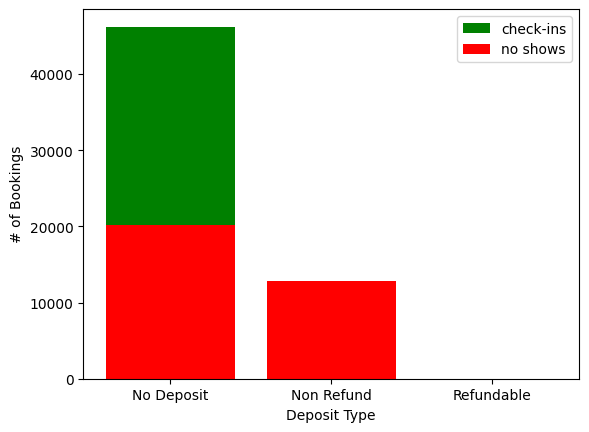

In [2220]:
deposit_type = df_hotel['deposit_type'].unique()
print(deposit_type)

df_nd = df_hotel[df_hotel['deposit_type'] == deposit_type[0]]['is_canceled']
df_nr = df_hotel[df_hotel['deposit_type'] == deposit_type[1]]['is_canceled']
df_r = df_hotel[df_hotel['deposit_type'] == deposit_type[2]]['is_canceled']

#print(len(df_nd), len(df_nr), len(df_r), len(df['deposit_type']))
# print(len(df_nd) + len(df_nr) + len(df_r), len(df['deposit_type']))

nd_isCanceled_counts = df_nd.value_counts()
nr_isCanceled_counts = df_nr.value_counts()
r_isCanceled_counts = df_r.value_counts()

print(nd_isCanceled_counts[0], nr_isCanceled_counts[0], r_isCanceled_counts[0])
print(nd_isCanceled_counts[1], nr_isCanceled_counts[1], r_isCanceled_counts[1])

print(nd_isCanceled_counts.sum() + nr_isCanceled_counts.sum() + r_isCanceled_counts.sum())

plt.bar(deposit_type, [nd_isCanceled_counts[0],nr_isCanceled_counts[0], r_isCanceled_counts[0]], color='g', label="check-ins")
plt.bar(deposit_type, [nd_isCanceled_counts[1],nr_isCanceled_counts[1], r_isCanceled_counts[1]], color='r', label="no shows")
plt.xlabel("Deposit Type")
plt.ylabel("# of Bookings")
plt.legend()
plt.show()

In [2221]:
df_hotel.drop(df_hotel[df_hotel['deposit_type'] == 'Non Refund'].index, inplace=True)
df_hotel['deposit_type'].unique()

/var/folders/8n/_4n9xz1x657b6zv7770xs6980000gn/T/ipykernel_52295/2331181820.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hotel.drop(df_hotel[df_hotel['deposit_type'] == 'Non Refund'].index, inplace=True)


array(['No Deposit', 'Refundable'], dtype=object)

In [2222]:
print(df_hotel.shape)

df_hotel["is_canceled"].value_counts()

(66458, 36)


0    46204
1    20254
Name: is_canceled, dtype: int64

In [2223]:
df_check_out = df_hotel[df_hotel['reservation_status'] == reservation_status[0]]
df_canceled = df_hotel[df_hotel['reservation_status'] == reservation_status[1]]
df_no_show = df_hotel[df_hotel['reservation_status'] == reservation_status[2]]

print("Check-Outs: ", len(df_check_out))
print("Cancellations: ", len(df_canceled))
print("No shows: ", len(df_no_show))

Check-Outs:  46204
Cancellations:  19354
No shows:  900


In [2224]:
print(df_no_show['diff_reservation_arrival_int'].unique(), "\n",
df_check_out['diff_reservation_arrival_int'].unique())

[0] 
 [ -2  -3  -7  -4 -10  -5  -1   0  -9  -6  -8 -29 -13 -19 -12 -11 -15 -17
 -20 -48 -14 -16 -21 -49 -24 -28 -18 -22 -23 -57 -34 -43 -27]


In [2225]:
# Thresholding output should be decided after X is created


df_days_in_advance = df_canceled['diff_reservation_arrival_int'].unique() # numpy array
#print(np.sort(dfc_days_in_advance))
df_advance_cancellation_counts = df_canceled['diff_reservation_arrival_int'].value_counts(normalize=True)
df_advance_cancellation_counts_sort = df_canceled['diff_reservation_arrival_int'].value_counts(normalize=True)[np.sort(df_days_in_advance)]

#print(dfc_advance_cancellation_counts_sort)

percentage = 0
c = 0

for a in df_advance_cancellation_counts_sort:
    percentage = percentage + a
    c = c + 1
    
    if percentage > 0.5:
        break

print(percentage)
#print(df_advance_cancellation_counts_sort[0:c])
#print(df_advance_cancellation_counts_sort[0:c-5].sum())
#print(dfc_advance_cancellation_counts_sort[0:c])

threshold = 7

#print(dfc_advance_cancellation_counts_sort[0:threshold+1].sum())

percentage_of_cancellation_examples_at_14_days_advance_notice = df_advance_cancellation_counts_sort[0:threshold+1].sum()

print("Cancellation instances we can classify as a no-show if we threshold <= ", threshold, "days", len(df_canceled[df_canceled['diff_reservation_arrival_int'] <= threshold]))


threshold = 14

#print(dfc_advance_cancellation_counts_sort[0:threshold+1].sum())

percentage_of_cancellation_examples_at_14_days_advance_notice = df_advance_cancellation_counts_sort[0:threshold+1].sum()

print("Cancellation instances we can classify as a no-show if we threshold <= ", threshold, "days", len(df_canceled[df_canceled['diff_reservation_arrival_int'] <= threshold]))

threshold = 21

#print(dfc_advance_cancellation_counts_sort[0:threshold+1].sum())

percentage_of_cancellation_examples_at_14_days_advance_notice = df_advance_cancellation_counts_sort[0:threshold+1].sum()

print("Cancellation instances we can classify as a no-show if we threshold <= ", threshold, "days", len(df_canceled[dfc_canceled['diff_reservation_arrival_int'] <= threshold]))

threshold = 30

#print(dfc_advance_cancellation_counts_sort[0:threshold+1].sum())

percentage_of_cancellation_examples_at_14_days_advance_notice = df_advance_cancellation_counts_sort[0:threshold+1].sum()

print("Cancellation instances we can classify as a no-show if we threshold <= ", threshold, "days", len(df_canceled[df_canceled['diff_reservation_arrival_int'] <= threshold]))

threshold = 45

# print(dfc_advance_cancellation_counts_sort[0:threshold+1].sum())

percentage_of_cancellation_examples_at_14_days_advance_notice = df_advance_cancellation_counts_sort[0:threshold+1].sum()

print("Cancellation instances we can classify as a no-show if we threshold <= ", threshold, "days", len(df_canceled[df_canceled['diff_reservation_arrival_int'] <= threshold]))

0.5040818435465537
Cancellation instances we can classify as a no-show if we threshold <=  7 days 3647
Cancellation instances we can classify as a no-show if we threshold <=  14 days 5821
Cancellation instances we can classify as a no-show if we threshold <=  21 days 7463
Cancellation instances we can classify as a no-show if we threshold <=  30 days 9010
Cancellation instances we can classify as a no-show if we threshold <=  45 days 11161


/var/folders/8n/_4n9xz1x657b6zv7770xs6980000gn/T/ipykernel_52295/198498839.py:30: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  percentage_of_cancellation_examples_at_14_days_advance_notice = df_advance_cancellation_counts_sort[0:threshold+1].sum()
/var/folders/8n/_4n9xz1x657b6zv7770xs6980000gn/T/ipykernel_52295/198498839.py:39: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  percentage_of_cancellation_examples_at_14_days_advance_notice = df_advance_cancellation_counts_sort[0:thres

In [2226]:
threshold = 30
df_hotel = df_hotel[df_hotel['diff_reservation_arrival_int'] <= threshold]
df_hotel['is_canceled'].value_counts()

0    46204
1     9910
Name: is_canceled, dtype: int64

[2015 2016 2017]


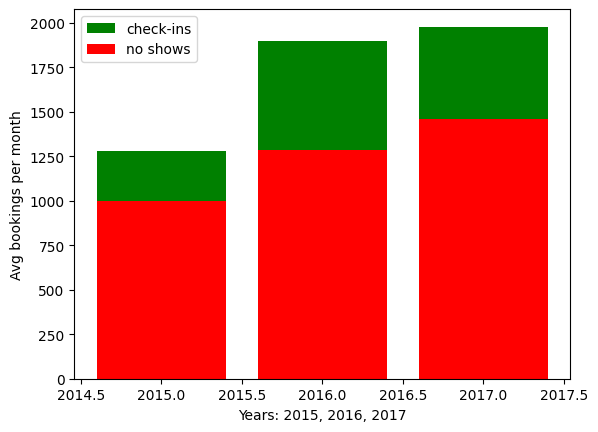

In [2204]:
years = np.sort(df_hotel['arrival_date_year'].unique())
print(years)

df_year_2015 = df_hotel[df_hotel['arrival_date_year'] == years[0]]
df_year_2016 = df_hotel[df_hotel['arrival_date_year'] == years[1]]
df_year_2017 = df_hotel[df_hotel['arrival_date_year'] == years[2]]

year_2015_is_Canceled = df_year_2015['is_canceled'].value_counts()
year_2016_is_Canceled = df_year_2016['is_canceled'].value_counts()
year_2017_is_Canceled = df_year_2017['is_canceled'].value_counts()

#print(year_2015_is_Canceled[0], year_2016_is_Canceled[0], year_2017_is_Canceled[0])

plt.bar(years, [year_2015_is_Canceled[0]/6, year_2016_is_Canceled[0]/12, year_2017_is_Canceled[0]/8], color="g", label="check-ins")
plt.bar(years, [year_2015_is_Canceled[1]/6, year_2016_is_Canceled[1]/12, year_2017_is_Canceled[1]/8], color="r", label="no shows")
plt.xlabel("Years: 2015, 2016, 2017")
plt.ylabel("Avg bookings per month")
plt.legend()
plt.show()

[2015 2016 2017]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[[   1    2    3    4    5    6    7    8    9   10   11   12]
 [2254 3063 4069 4015 4572 4364 4779 5376 4290 4336 2695 2391]
 [ 581  907  827  909  999  836 1024 1014  735  832  624  622]]
[2835 3970 4896 4924 5571 5200 5803 6390 5025 5168 3319 3013]
56114
[ 7  8  9 10 11 12]
[[   7    8    9   10   11   12]
 [ 459 1248 1986 2064  934  985]
 [ 368  368  265  311  160  180]]
[ 827 1616 2251 2375 1094 1165]
9328
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[[   1    2    3    4    5    6    7    8    9   10   11   12]
 [ 926 1440 1935 2022 2233 2201 2085 2126 2304 2272 1761 1406]
 [ 212  457  443  492  461  478  311  357  470  521  464  442]]
[1138 1897 2378 2514 2694 2679 2396 2483 2774 2793 2225 1848]
27819
[1 2 3 4 5 6 7 8]
[[   1    2    3    4    5    6    7    8]
 [1328 1623 2134 1993 2339 2163 2235 2002]
 [ 369  450  384  417  538  358  345  289]]
[1697 2073 2518 2410 2877 2521 2580 2291]
18967


Text(0.5, 1.0, 'City Hotel: Year 2017')

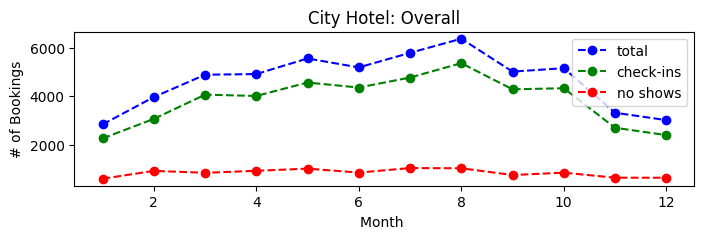

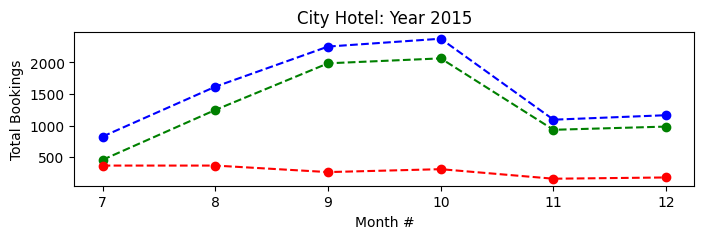

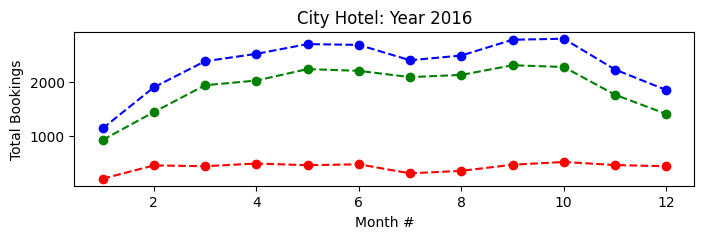

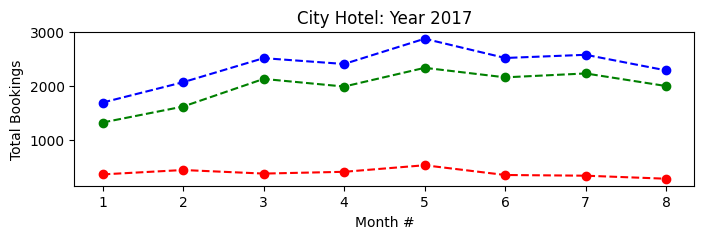

In [2238]:
# Build line plots for months where demand is high

df.head()

df_hotel.head()

years = np.sort(df_hotel['arrival_date_year'].unique())
print(years)

df_year_2015 = df_hotel[df_hotel['arrival_date_year'] == years[0]]
df_year_2016 = df_hotel[df_hotel['arrival_date_year'] == years[1]]
df_year_2017 = df_hotel[df_hotel['arrival_date_year'] == years[2]]


months = np.sort(df_hotel['arrival_date_month_#'].unique())
print(months)

df_month_value_counts = np.zeros((3, len(months)), dtype=int)
df_month_value_counts[0] = months
i = 0

for m in months:
    m_Counts = df_hotel[df_hotel['arrival_date_month_#'] == m]['is_canceled'].value_counts()
    #print(m_Counts)
    df_month_value_counts[1][i] = m_Counts[0]
    df_month_value_counts[2][i] = m_Counts[1]
    i=i+1
    
print(df_month_value_counts)

df_month_value_totals = np.sum(df_month_value_counts[1:], axis=0)

print(df_month_value_totals)
print(np.sum(df_month_value_totals))

fig, ax = plt.subplots(figsize=(8, 2))
plt.plot(df_month_value_counts[0], df_month_value_totals, color = 'blue', linestyle='dashed', marker='o', label="total")
plt.plot(df_month_value_counts[0], df_month_value_counts[1], color = 'green', linestyle='dashed', marker='o', label="check-ins")
plt.plot(df_month_value_counts[0], df_month_value_counts[2], color = 'red', linestyle='dashed', marker='o', label="no shows")
plt.xlabel("Month ")
plt.ylabel("# of Bookings")
plt.title("City Hotel: Overall")
plt.legend()
months_2015 = np.sort(df_year_2015['arrival_date_month_#'].unique())
print(months_2015)

df_month_value_counts_2015 = np.zeros((3, len(months_2015)), dtype=int)
df_month_value_counts_2015[0] = months_2015
i = 0

for m in months_2015:
    m_Counts = df_year_2015[df_year_2015['arrival_date_month_#'] == m]['is_canceled'].value_counts()
    #print(m_Counts)
    df_month_value_counts_2015[1][i] = m_Counts[0]
    df_month_value_counts_2015[2][i] = m_Counts[1]
    i=i+1

print(df_month_value_counts_2015)
#print(df_month_value_counts[0][0])

df_month_value_totals_2015 = np.sum(df_month_value_counts_2015[1:], axis=0)

print(df_month_value_totals_2015)
print(np.sum(df_month_value_totals_2015))

fig, ax = plt.subplots(figsize=(8, 2))
plt.plot(df_month_value_counts_2015[0], df_month_value_totals_2015, color = 'blue', linestyle='dashed', marker='o',label="total")
plt.plot(df_month_value_counts_2015[0], df_month_value_counts_2015[1], color = 'green', linestyle='dashed', marker='o', label="check-ins")
plt.plot(df_month_value_counts_2015[0], df_month_value_counts_2015[2], color = 'red', linestyle='dashed', marker='o', label="no shows")
plt.xlabel("Month #")
plt.ylabel("Total Bookings")
plt.title("City Hotel: Year 2015")


# ========================== #


months_2016 = np.sort(df_year_2016['arrival_date_month_#'].unique())
print(months_2016)

df_month_value_counts_2016 = np.zeros((3, len(months_2016)), dtype=int)
df_month_value_counts_2016[0] = months_2016
i = 0

for m in months_2016:
    m_Counts = df_year_2016[df_year_2016['arrival_date_month_#'] == m]['is_canceled'].value_counts()
    #print(m_Counts)
    df_month_value_counts_2016[1][i] = m_Counts[0]
    df_month_value_counts_2016[2][i] = m_Counts[1]
    i=i+1

print(df_month_value_counts_2016)
#print(df_month_value_counts[0][0])

df_month_value_totals_2016 = np.sum(df_month_value_counts_2016[1:], axis=0)

print(df_month_value_totals_2016)
print(np.sum(df_month_value_totals_2016))


fig, ax = plt.subplots(figsize=(8, 2))
plt.plot(df_month_value_counts_2016[0], df_month_value_totals_2016, color = 'blue', linestyle='dashed', marker='o', label="total")
plt.plot(df_month_value_counts_2016[0], df_month_value_counts_2016[1], color = 'green', linestyle='dashed', marker='o', label="check-ins")
plt.plot(df_month_value_counts_2016[0], df_month_value_counts_2016[2], color = 'red', linestyle='dashed', marker='o', label="no shows")
plt.xlabel("Month #")
plt.ylabel("Total Bookings")
plt.title("City Hotel: Year 2016")


# ========================== #

months_2017 = np.sort(df_year_2017['arrival_date_month_#'].unique())
print(months_2017)

df_month_value_counts_2017 = np.zeros((3, len(months_2017)), dtype=int)
df_month_value_counts_2017[0] = months_2017
i = 0

for m in months_2017:
    m_Counts = df_year_2017[df_year_2017['arrival_date_month_#'] == m]['is_canceled'].value_counts()
    #print(m_Counts)
    df_month_value_counts_2017[1][i] = m_Counts[0]
    df_month_value_counts_2017[2][i] = m_Counts[1]
    i=i+1

print(df_month_value_counts_2017)
#print(df_month_value_counts[0][0])

df_month_value_totals_2017 = np.sum(df_month_value_counts_2017[1:], axis=0)

print(df_month_value_totals_2017)
print(np.sum(df_month_value_totals_2017))

fig, ax = plt.subplots(figsize=(8, 2))
plt.plot(df_month_value_counts_2017[0], df_month_value_totals_2017, color = 'blue', linestyle='dashed', marker='o', label="total")
plt.plot(df_month_value_counts_2017[0], df_month_value_counts_2017[1], color = 'green', linestyle='dashed', marker='o', label="check-ins")
plt.plot(df_month_value_counts_2017[0], df_month_value_counts_2017[2], color = 'red', linestyle='dashed', marker='o', label="no shows")
plt.xlabel("Month #")
plt.ylabel("Total Bookings")
plt.title("City Hotel: Year 2017")



# April to Oct: Add charts to depict stability of demand across these months

2015: [   0    0    0    0    0    0  827 1616 2251 2375 1094 1165]
2016: [1138 1897 2378 2514 2694 2679 2396 2483 2774 2793 2225 1848]
2017: [1697 2073 2518 2410 2877 2521 2580 2291    0    0    0    0]


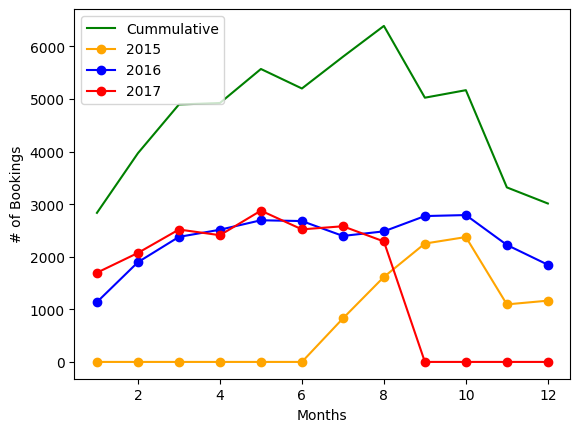

In [2239]:
total = {"2015": np.arange(1,13), "2016": np.arange(1,13), "2017" : np.arange(1,13)}

#print(total)

total['2015'][0:6] = 0
total['2015'][6:12] = df_month_value_totals_2015

total['2016'] = df_month_value_totals_2016

total['2017'][0:8] = df_month_value_totals_2017
total['2017'][8:] = 0
#print("\n")
print("2015:", total['2015'])
print("2016:", total['2016'])
print("2017:", total['2017'])

plt.plot(np.arange(1,13), total['2015']+total['2016']+total['2017'], color='g', label='Cummulative')

plt.plot(np.arange(1,13), total['2015'], color = 'orange', label='2015', marker='o')
plt.plot(np.arange(1,13), total['2016'], color = 'b', label='2016', marker='o')
plt.plot(np.arange(1,13), total['2017'], color = 'r', label='2017', marker='o')
plt.xlabel("Months")
plt.ylabel("# of Bookings")
plt.legend()
plt.show()


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 22 23 24 25
 26 27 28 29 30 31 21]


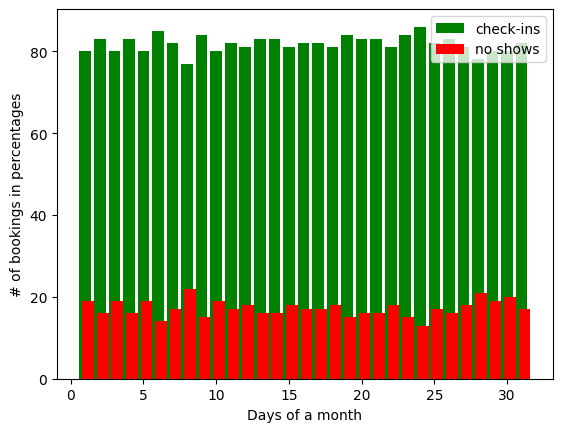

[80 83 80 83 80 85 82 77 84 80 82 81 83 83 81 82 82 81 84 83 81 84 86 82
 83 81 78 80 80 82 83]
[19 16 19 16 19 14 17 22 15 19 17 18 16 16 18 17 17 18 15 16 18 15 13 17
 16 18 21 19 20 17 16]


In [2240]:
day_of_month = df_hotel["arrival_date_day_of_month"].unique()
print(day_of_month)

day_of_month_Counts_0 = np.arange(len(day_of_month))
day_of_month_Counts_1 = np.arange(len(day_of_month))

i=0
for day in day_of_month:
    df_day = df_hotel[df_hotel["arrival_date_day_of_month"] == day]
    #print("For day of month: ", day)
    counts = df_day["is_canceled"].value_counts()
    #print(counts[0], counts[1])
    day_of_month_Counts_0[i] = (counts[0]/(counts[0]+counts[1])) * 100
    day_of_month_Counts_1[i] = (counts[1]/(counts[0]+counts[1])) * 100
    #print(day_of_month_Counts_0[i], day_of_month_Counts_1[i])
    i = i + 1
    
plt.bar(day_of_month, day_of_month_Counts_0, color="g", label="check-ins")
plt.bar(day_of_month+0.2, day_of_month_Counts_1, color="r", label="no shows")
plt.xlabel("Days of a month")
plt.ylabel("# of bookings in percentages")
plt.legend()
plt.show()

print(day_of_month_Counts_0)
print(day_of_month_Counts_1)

['HB' 'BB' 'SC' 'FB']


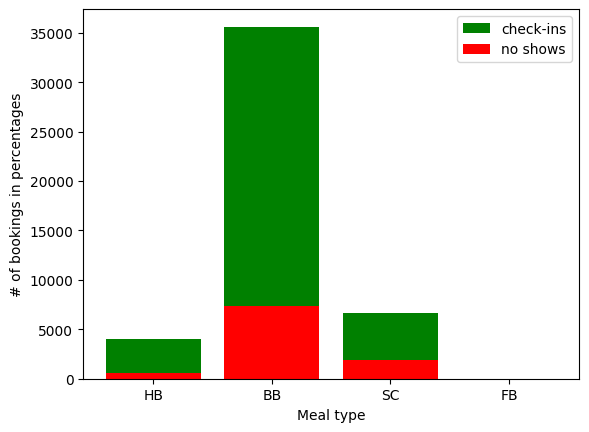

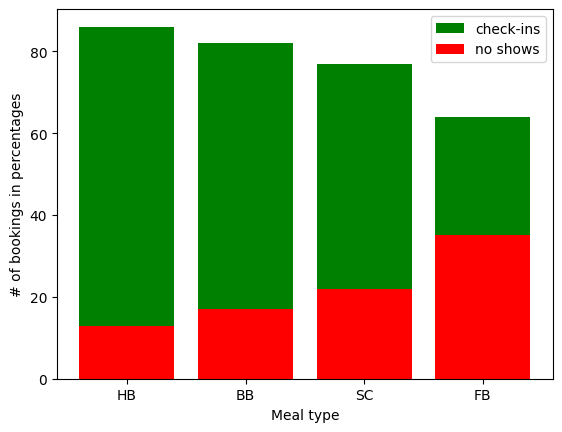

[86 82 77 64]
[13 17 22 35]


In [2241]:
meal = df_hotel["meal"].unique()
print(meal)

meal_Counts_0 = np.arange(len(meal))
meal_Counts_1 = np.arange(len(meal))

i=0
for m in meal:
    df_meal = df_hotel[df_hotel["meal"] == m]
    #print("For day of month: ", day)
    counts = df_meal["is_canceled"].value_counts()
    #print(counts[0], counts[1])
    meal_Counts_0[i] = counts[0]
    meal_Counts_1[i] = counts[1]
    #print(day_of_month_Counts_0[i], day_of_month_Counts_1[i])
    i = i + 1
    
plt.bar(meal, meal_Counts_0, color="g", label="check-ins")
plt.bar(meal, meal_Counts_1, color="r", label="no shows")
plt.xlabel("Meal type")
plt.ylabel("# of bookings in percentages")
plt.legend()
plt.show()

i=0
for m in meal:
    df_meal = df_hotel[df_hotel["meal"] == m]
    #print("For day of month: ", day)
    counts = df_meal["is_canceled"].value_counts()
    #print(counts[0], counts[1])
    meal_Counts_0[i] = (counts[0]/(counts[0]+counts[1])) * 100
    meal_Counts_1[i] = (counts[1]/(counts[0]+counts[1])) * 100
    #print(day_of_month_Counts_0[i], day_of_month_Counts_1[i])
    i = i + 1
    
plt.bar(meal, meal_Counts_0, color="g", label="check-ins")
plt.bar(meal, meal_Counts_1, color="r", label="no shows")
plt.xlabel("Meal type")
plt.ylabel("# of bookings in percentages")
plt.legend()
plt.show()


print(meal_Counts_0)
print(meal_Counts_1)

[0 1]


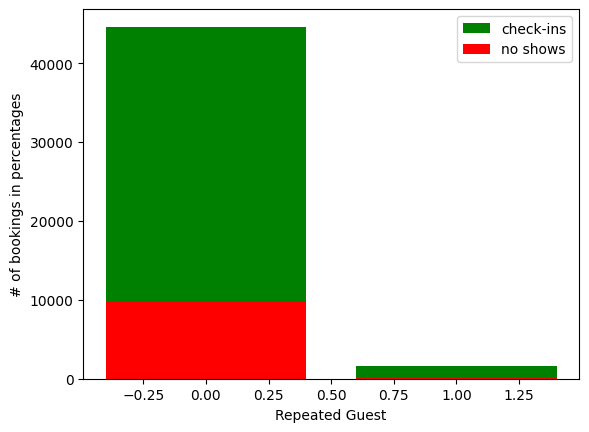

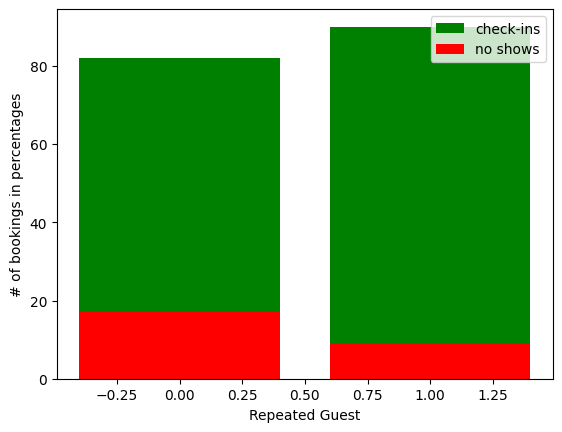

[82 90]
[17  9]


In [2242]:
feature_i = df_hotel["is_repeated_guest"].unique()
print(feature_i)

feature_i_Counts_0 = np.arange(len(feature_i))
feature_i_Counts_1 = np.arange(len(feature_i))

i=0
for v in feature_i:
    df_feature_i = df_hotel[df_hotel["is_repeated_guest"] == v]
    #print("For day of month: ", day)
    counts = df_feature_i["is_canceled"].value_counts()
    #print(counts[0], counts[1])
    feature_i_Counts_0[i] = counts[0]
    feature_i_Counts_1[i] = counts[1]
    #print(day_of_month_Counts_0[i], day_of_month_Counts_1[i])
    i = i + 1
    
plt.bar(feature_i, feature_i_Counts_0, color="g", label="check-ins")
plt.bar(feature_i, feature_i_Counts_1, color="r", label="no shows")
plt.xlabel("Repeated Guest")
plt.ylabel("# of bookings in percentages")
plt.legend()
plt.show()

i=0
for v in feature_i:
    df_feature_i = df_hotel[df_hotel["is_repeated_guest"] == v]
    #print("For day of month: ", day)
    counts = df_feature_i["is_canceled"].value_counts()
    #print(counts[0], counts[1])
    feature_i_Counts_0[i] = (counts[0]/(counts[0]+counts[1]))*100
    feature_i_Counts_1[i] = (counts[1]/(counts[0]+counts[1]))*100
    #print(day_of_month_Counts_0[i], day_of_month_Counts_1[i])
    i = i + 1
    
plt.bar(feature_i, feature_i_Counts_0, color="g", label="check-ins")
plt.bar(feature_i, feature_i_Counts_1, color="r", label="no shows")
plt.xlabel("Repeated Guest")
plt.ylabel("# of bookings in percentages")
plt.legend()
plt.show()


print(feature_i_Counts_0)
print(feature_i_Counts_1)

['PRT' 'ITA' 'ESP' 'DEU' 'FRA' 'NLD' 'GBR' 'ROU' 'BRA' 'SWE' 'AUT' 'AGO'
 'BEL' 'CHE' 'NOR' 'RUS' 'ISR' 'IRL' 'POL' 'CHN' 'USA' 'MAR' 'AUS' 'MOZ'
 'TUN' 'DNK' 'MEX' 'GRC' 'DZA' 'COL' 'LUX' 'CN' 'LVA' 'FIN' 'HRV' 'STP'
 'BGR' 'UKR' 'VEN' 'TWN' 'IRN' 'KOR' 'TUR' 'BLR' 'JPN' 'CZE' 'HUN' 'AZE'
 'KAZ' 'IND' 'NZL' 'IDN' 'LTU' 'LBN' 'SRB' 'SVN' 'SVK' 'MYS' 'CMR' 'CHL'
 'ARG' 'SGP' 'SEN' 'PER' 'EGY' 'SAU' 'KNA' 'JOR' 'ZAF' 'THA' 'KWT' 'LKA'
 'ALB' 'ETH' 'PHL' 'ARE' 'ECU' 'OMN' 'IRQ' 'AND' 'CPV' 'MUS' 'HND' 'NGA'
 'RWA' 'EST' 'PAK' 'GEO' 'ZMB' 'QAT' 'KHM' 'HKG' 'BGD' 'ISL' 'UZB' 'TJK'
 'ARM' 'MDV' 'NIC' 'CYP' 'GIB' 'MLT' 'TZA' 'GAB' 'BIH' 'VNM' 'TMP' 'KEN'
 'PRI' 'MAC' 'LIE' 'GNB' 'URY' 'UMI' 'JEY' 'FRO' 'CIV' 'CRI' 'MMR' 'DOM'
 'PAN' 'BFA' 'MCO' 'LBY' 'MLI' 'BHR' 'NAM' 'BOL' 'JAM' 'SYC' 'PRY' 'BRB'
 'ABW' 'AIA' 'SLV' 'DMA' 'CUB' 'PYF' 'UGA' 'GUY' 'LCA' 'ATA' 'MKD' 'MNE'
 'GTM' 'GHA' 'ASM' 'SYR' 'TGO' 'SUR' 'MRT' 'CAF' 'NCL' 'KIR' 'SDN' 'ATF'
 'SLE' 'LAO' 'COM']
159


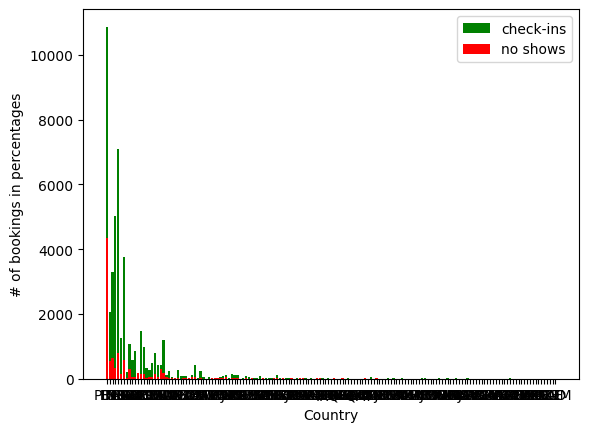

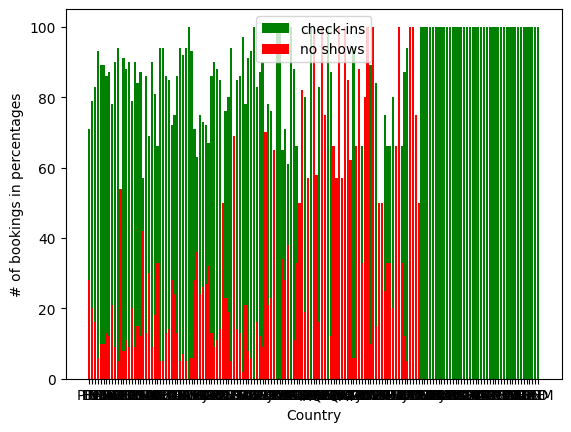

[ 71  79  83  93  89  89  86  87  78  90  94  45  91  88  90  79  90  84
  87  57  86  69  90  81  66  94  94  86  85  72  75  86  94  92  94 100
  93  71  63  75  73  72  67  86  90  88  85  50  76  80  94  30  85  86
  97  78  91  93 100  83  87  90  30  78  76  35 100 100  65  71  61 100
  88  66  50  17  80  42 100   0  41  83   0  25 100  87  33  42   0  42
   0  14  37  94  33  11  66  20   0  89   0  84  50  50  75  66  66  80
  33   0  66  87  94   0   0  25  50 100 100 100 100 100 100 100 100 100
 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100
 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100]
[ 28  20  16   6  10  10  13  12  21   9   5  54   8  11   9  20   9  15
  12  42  13  30   9  18  33   5   5  13  14  28  24  13   5   7   5   0
   6  28  36  24  26  27  32  13   9  11  14  50  23  19   5  69  14  13
   2  21   8   6   0  16  12   9  70  21  23  65   0   0  34  28  38   0
  11  33  50  82  19  57   0 100  58  16 100  75   0  12  66  

In [2243]:
feature_i = df_hotel["country"].unique()
print(feature_i)
print(len(feature_i))

feature_i_Counts_0 = np.arange(len(feature_i))
feature_i_Counts_1 = np.arange(len(feature_i))

i=0
for v in feature_i:
    df_feature_i = df_hotel[df_hotel["country"] == v]
    #print("For day of month: ", day)
    #print(v)
    counts = df_feature_i["is_canceled"].value_counts()
    #print(counts)
    if(len(counts) == 1):
        if counts.index[0] == 0:
            feature_i_Counts_0[i] = counts[counts.index[0]]
            feature_i_Counts_1[i] = 0
            
        if counts.index[0] == 1:
            feature_i_Counts_1[i] = counts[counts.index[0]]
            feature_i_Counts_0[i] = 0   
    else:
        feature_i_Counts_0[i] = counts[0]
        feature_i_Counts_1[i] = counts[1]
    #print(day_of_month_Counts_0[i], day_of_month_Counts_1[i])
    i = i + 1
    
plt.bar(feature_i, feature_i_Counts_0, color="g", label="check-ins")
plt.bar(feature_i, feature_i_Counts_1, color="r", label="no shows")
plt.xlabel("Country")
plt.ylabel("# of bookings in percentages")
plt.legend()
plt.show()

i=0
for v in feature_i:
    df_feature_i = df_hotel[df_hotel["country"] == v]
    #print("For day of month: ", day)
    #print(v)
    counts = df_feature_i["is_canceled"].value_counts()
    #print(counts)
    if(len(counts) == 1):
        if counts.index[0] == 0:
            feature_i_Counts_0[i] = 100
            feature_i_Counts_1[i] = 0
            
        if counts.index[0] == 1:
            feature_i_Counts_1[i] = 100
            feature_i_Counts_0[i] = 0   
    else:
        feature_i_Counts_0[i] = (counts[0]/(counts[0]+counts[1])) * 100
        feature_i_Counts_1[i] = (counts[1]/(counts[0]+counts[1])) * 100
    #print(day_of_month_Counts_0[i], day_of_month_Counts_1[i])
    i = i + 1
    
plt.bar(feature_i, feature_i_Counts_0, color="g", label="check-ins")
plt.bar(feature_i, feature_i_Counts_1, color="r", label="no shows")
plt.xlabel("Country")
plt.ylabel("# of bookings in percentages")
plt.legend()
plt.show()


print(feature_i_Counts_0)
print(feature_i_Counts_1)

s=0
ns=0

country_shows_only = []
country_no_shows_only = []

for i in range(len(feature_i)):
    if feature_i_Counts_0[i] == 100:
        country_shows_only.append(feature_i[i])
        #print("Only shows")
        #print(feature_i[i])
        s = s+1
        
    if feature_i_Counts_1[i] == 100:
        #print("Only no shows")
        #print(feature_i[i])
        country_no_shows_only.append(feature_i[i])
        ns = ns+1
        
print(s, ns)
print("Bookings from this country are honored 100%: ")
print(country_shows_only)
print("Bookings from this country are cancelled 100%: ")
print(country_no_shows_only)



['Offline TA/TO' 'Online TA' 'Groups' 'Complementary' 'Direct' 'Corporate'
 'Aviation']
7


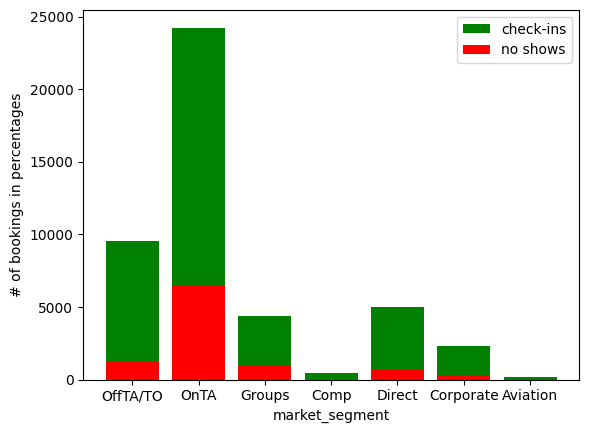

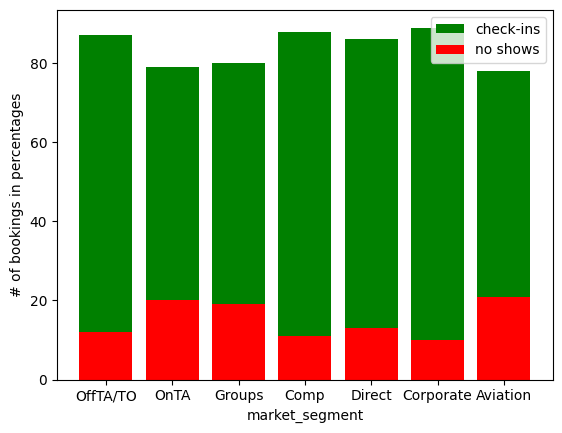

[87 79 80 88 86 89 78]
[12 20 19 11 13 10 21]


In [2244]:
feature_str = "market_segment"

feature_i = df_hotel[feature_str].unique()
print(feature_i)
print(len(feature_i))

feature_i_names = ['OffTA/TO', 'OnTA', 'Groups', 'Comp', 'Direct', 'Corporate', 'Aviation']

feature_i_Counts_0 = np.arange(len(feature_i))
feature_i_Counts_1 = np.arange(len(feature_i))

i=0
for v in feature_i:
    df_feature_i = df_hotel[df_hotel[feature_str] == v]
    #print("For day of month: ", day)
    #print(v)
    counts = df_feature_i["is_canceled"].value_counts()
    #print(counts)
    if(len(counts) == 1):
        if counts.index[0] == 0:
            feature_i_Counts_0[i] = counts[counts.index[0]]
            feature_i_Counts_1[i] = 0
            
        if counts.index[0] == 1:
            feature_i_Counts_1[i] = counts[counts.index[0]]
            feature_i_Counts_0[i] = 0   
    else:
        feature_i_Counts_0[i] = counts[0]
        feature_i_Counts_1[i] = counts[1]
    #print(day_of_month_Counts_0[i], day_of_month_Counts_1[i])
    i = i + 1
    
plt.bar(feature_i_names, feature_i_Counts_0, color="g", label="check-ins")
plt.bar(feature_i_names, feature_i_Counts_1, color="r", label="no shows")
plt.xlabel(feature_str)
plt.ylabel("# of bookings in percentages")
plt.legend()
plt.show()

i=0
for v in feature_i:
    df_feature_i = df_hotel[df_hotel[feature_str] == v]
    #print("For day of month: ", day)
    #print(v)
    counts = df_feature_i["is_canceled"].value_counts()
    #print(counts)
    if(len(counts) == 1):
        if counts.index[0] == 0:
            feature_i_Counts_0[i] = 100
            feature_i_Counts_1[i] = 0
            
        if counts.index[0] == 1:
            feature_i_Counts_1[i] = 100
            feature_i_Counts_0[i] = 0   
    else:
        feature_i_Counts_0[i] = (counts[0]/(counts[0]+counts[1])) * 100
        feature_i_Counts_1[i] = (counts[1]/(counts[0]+counts[1])) * 100
    #print(day_of_month_Counts_0[i], day_of_month_Counts_1[i])
    i = i + 1
    
plt.bar(feature_i_names, feature_i_Counts_0, color="g", label="check-ins")
plt.bar(feature_i_names, feature_i_Counts_1, color="r", label="no shows")
plt.xlabel(feature_str)
plt.ylabel("# of bookings in percentages")
plt.legend()
plt.show()


print(feature_i_Counts_0)
print(feature_i_Counts_1)

['TA/TO' 'Direct' 'Corporate' 'GDS']
4


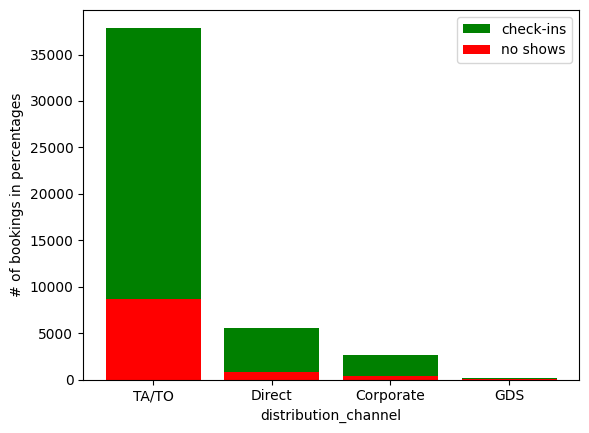

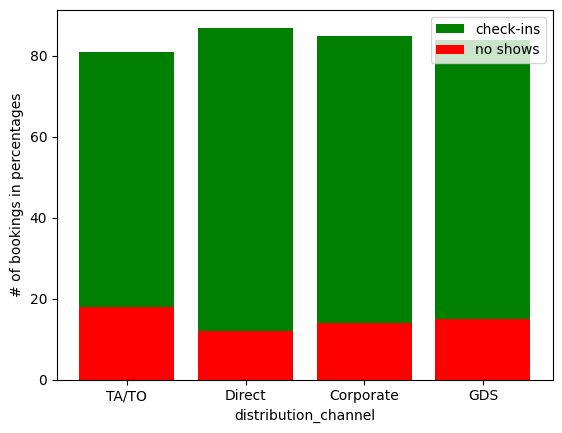

[81 87 85 84]
[18 12 14 15]


In [2245]:
feature_str = "distribution_channel"

feature_i = df_hotel[feature_str].unique()
print(feature_i)
print(len(feature_i))

feature_i_Counts_0 = np.arange(len(feature_i))
feature_i_Counts_1 = np.arange(len(feature_i))

i=0
for v in feature_i:
    df_feature_i = df_hotel[df_hotel[feature_str] == v]
    #print("For day of month: ", day)
    #print(v)
    counts = df_feature_i["is_canceled"].value_counts()
    #print(counts)
    if(len(counts) == 1):
        if counts.index[0] == 0:
            feature_i_Counts_0[i] = counts[counts.index[0]]
            feature_i_Counts_1[i] = 0
            
        if counts.index[0] == 1:
            feature_i_Counts_1[i] = counts[counts.index[0]]
            feature_i_Counts_0[i] = 0   
    else:
        feature_i_Counts_0[i] = counts[0]
        feature_i_Counts_1[i] = counts[1]
    #print(day_of_month_Counts_0[i], day_of_month_Counts_1[i])
    i = i + 1
    
plt.bar(feature_i, feature_i_Counts_0, color="g", label="check-ins")
plt.bar(feature_i, feature_i_Counts_1, color="r", label="no shows")
plt.xlabel(feature_str)
plt.ylabel("# of bookings in percentages")
plt.legend()
plt.show()

i=0
for v in feature_i:
    df_feature_i = df_hotel[df_hotel[feature_str] == v]
    #print("For day of month: ", day)
    #print(v)
    counts = df_feature_i["is_canceled"].value_counts()
    #print(counts)
    if(len(counts) == 1):
        if counts.index[0] == 0:
            feature_i_Counts_0[i] = 100
            feature_i_Counts_1[i] = 0
            
        if counts.index[0] == 1:
            feature_i_Counts_1[i] = 100
            feature_i_Counts_0[i] = 0   
    else:
        feature_i_Counts_0[i] = (counts[0]/(counts[0]+counts[1])) * 100
        feature_i_Counts_1[i] = (counts[1]/(counts[0]+counts[1])) * 100
    #print(day_of_month_Counts_0[i], day_of_month_Counts_1[i])
    i = i + 1
    
plt.bar(feature_i, feature_i_Counts_0, color="g", label="check-ins")
plt.bar(feature_i, feature_i_Counts_1, color="r", label="no shows")
plt.xlabel(feature_str)
plt.ylabel("# of bookings in percentages")
plt.legend()
plt.show()


print(feature_i_Counts_0)
print(feature_i_Counts_1)

['A' 'B' 'F' 'D' 'G' 'E' 'K' 'C' 'P']
9


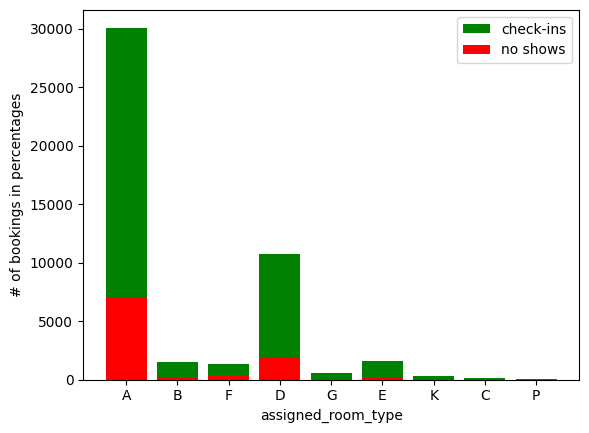

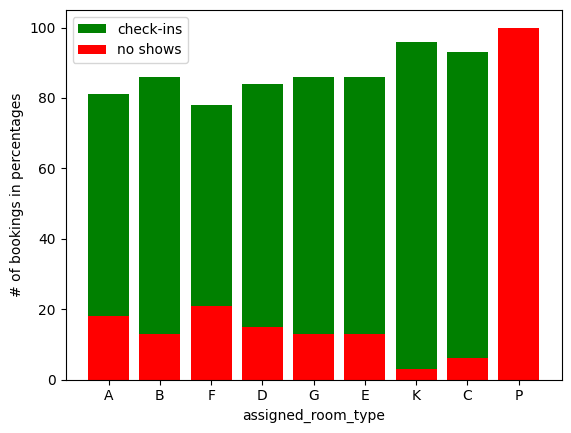

[81 86 78 84 86 86 96 93  0]
[ 18  13  21  15  13  13   3   6 100]


In [2246]:
feature_str = "assigned_room_type"

feature_i = df_hotel[feature_str].unique()
print(feature_i)
print(len(feature_i))

feature_i_Counts_0 = np.arange(len(feature_i))
feature_i_Counts_1 = np.arange(len(feature_i))

i=0
for v in feature_i:
    df_feature_i = df_hotel[df_hotel[feature_str] == v]
    #print("For day of month: ", day)
    #print(v)
    counts = df_feature_i["is_canceled"].value_counts()
    #print(counts)
    if(len(counts) == 1):
        if counts.index[0] == 0:
            feature_i_Counts_0[i] = counts[counts.index[0]]
            feature_i_Counts_1[i] = 0
            
        if counts.index[0] == 1:
            feature_i_Counts_1[i] = counts[counts.index[0]]
            feature_i_Counts_0[i] = 0   
    else:
        feature_i_Counts_0[i] = counts[0]
        feature_i_Counts_1[i] = counts[1]
    #print(day_of_month_Counts_0[i], day_of_month_Counts_1[i])
    i = i + 1
    
plt.bar(feature_i, feature_i_Counts_0, color="g", label="check-ins")
plt.bar(feature_i, feature_i_Counts_1, color="r", label="no shows")
plt.xlabel(feature_str)
plt.ylabel("# of bookings in percentages")
plt.legend()
plt.show()

i=0
for v in feature_i:
    df_feature_i = df_hotel[df_hotel[feature_str] == v]
    #print("For day of month: ", day)
    #print(v)
    counts = df_feature_i["is_canceled"].value_counts()
    #print(counts)
    if(len(counts) == 1):
        if counts.index[0] == 0:
            feature_i_Counts_0[i] = 100
            feature_i_Counts_1[i] = 0
            
        if counts.index[0] == 1:
            feature_i_Counts_1[i] = 100
            feature_i_Counts_0[i] = 0   
    else:
        feature_i_Counts_0[i] = (counts[0]/(counts[0]+counts[1])) * 100
        feature_i_Counts_1[i] = (counts[1]/(counts[0]+counts[1])) * 100
    #print(day_of_month_Counts_0[i], day_of_month_Counts_1[i])
    i = i + 1
    
plt.bar(feature_i, feature_i_Counts_0, color="g", label="check-ins")
plt.bar(feature_i, feature_i_Counts_1, color="r", label="no shows")
plt.xlabel(feature_str)
plt.ylabel("# of bookings in percentages")
plt.legend()
plt.show()

print(feature_i_Counts_0)
print(feature_i_Counts_1)

['A' 'B' 'D' 'F' 'E' 'G' 'C' 'P']
8


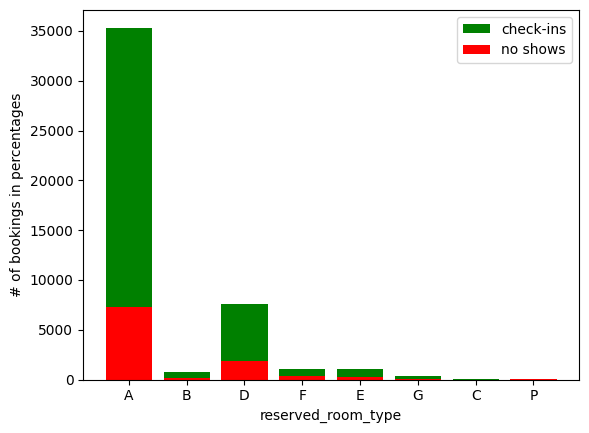

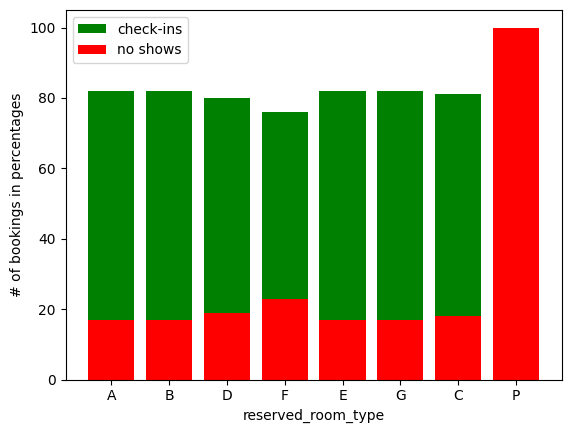

[82 82 80 76 82 82 81  0]
[ 17  17  19  23  17  17  18 100]


In [2247]:
feature_str = "reserved_room_type"

feature_i = df_hotel[feature_str].unique()
print(feature_i)
print(len(feature_i))

feature_i_Counts_0 = np.arange(len(feature_i))
feature_i_Counts_1 = np.arange(len(feature_i))

i=0
for v in feature_i:
    df_feature_i = df_hotel[df_hotel[feature_str] == v]
    #print("For day of month: ", day)
    #print(v)
    counts = df_feature_i["is_canceled"].value_counts()
    #print(counts)
    if(len(counts) == 1):
        if counts.index[0] == 0:
            feature_i_Counts_0[i] = counts[counts.index[0]]
            feature_i_Counts_1[i] = 0
            
        if counts.index[0] == 1:
            feature_i_Counts_1[i] = counts[counts.index[0]]
            feature_i_Counts_0[i] = 0   
    else:
        feature_i_Counts_0[i] = counts[0]
        feature_i_Counts_1[i] = counts[1]
    #print(day_of_month_Counts_0[i], day_of_month_Counts_1[i])
    i = i + 1
    
plt.bar(feature_i, feature_i_Counts_0, color="g", label="check-ins")
plt.bar(feature_i, feature_i_Counts_1, color="r", label="no shows")
plt.xlabel(feature_str)
plt.ylabel("# of bookings in percentages")
plt.legend()
plt.show()

i=0
for v in feature_i:
    df_feature_i = df_hotel[df_hotel[feature_str] == v]
    #print("For day of month: ", day)
    #print(v)
    counts = df_feature_i["is_canceled"].value_counts()
    #print(counts)
    if(len(counts) == 1):
        if counts.index[0] == 0:
            feature_i_Counts_0[i] = 100
            feature_i_Counts_1[i] = 0
            
        if counts.index[0] == 1:
            feature_i_Counts_1[i] = 100
            feature_i_Counts_0[i] = 0   
    else:
        feature_i_Counts_0[i] = (counts[0]/(counts[0]+counts[1])) * 100
        feature_i_Counts_1[i] = (counts[1]/(counts[0]+counts[1])) * 100
    #print(day_of_month_Counts_0[i], day_of_month_Counts_1[i])
    i = i + 1
    
plt.bar(feature_i, feature_i_Counts_0, color="g", label="check-ins")
plt.bar(feature_i, feature_i_Counts_1, color="r", label="no shows")
plt.xlabel(feature_str)
plt.ylabel("# of bookings in percentages")
plt.legend()
plt.show()

print(feature_i_Counts_0)
print(feature_i_Counts_1)

Assigned room types:  ['A' 'B' 'F' 'D' 'G' 'E' 'K' 'C' 'P']
Reservered room types:  ['A' 'B' 'D' 'F' 'E' 'G' 'C' 'P']
56114
0    39433
1     9566
Name: is_canceled, dtype: int64
56114
0    6771
1     344
Name: is_canceled, dtype: int64


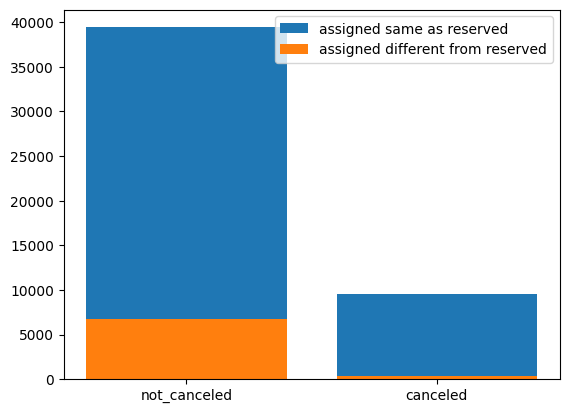

In [2248]:
print("Assigned room types: ", df_hotel["assigned_room_type"].unique())
print("Reservered room types: ", df_hotel["reserved_room_type"].unique())

#print(df_hotel[["assigned_room_type", "is_canceled"]].value_counts())

df__ = df_hotel[["is_canceled", "assigned_room_type", "reserved_room_type"]]
df_same = df__[df__["assigned_room_type"] == df__["reserved_room_type"]]
print(len(df_hotel))
print(df_same["is_canceled"].value_counts())

df_not_same = df__[df__["assigned_room_type"] != df__["reserved_room_type"]]
print(len(df_hotel))
print(df_not_same["is_canceled"].value_counts())

is_Canceled = [0, 1]
plt.bar(["not_canceled", "canceled"], df_same["is_canceled"].value_counts(), label="assigned same as reserved")
plt.bar(["not_canceled", "canceled"], df_not_same["is_canceled"].value_counts(), label="assigned different from reserved")
plt.legend()
plt.show()

# It seems having a different assigned room type than reserved room type does not have any bearing on cancellations

['Transient' 'Transient-Party' 'Contract' 'Group']
4


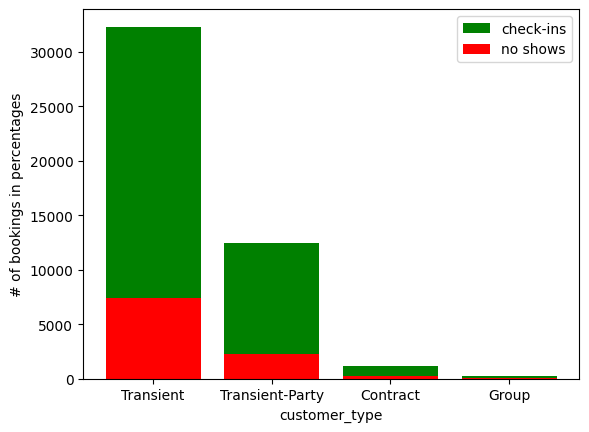

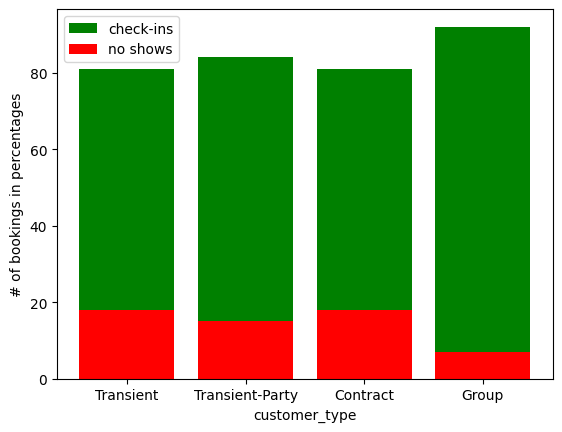

[81 84 81 92]
[18 15 18  7]


In [2249]:
feature_str = "customer_type"

feature_i = df_hotel[feature_str].unique()
print(feature_i)
print(len(feature_i))

feature_i_Counts_0 = np.arange(len(feature_i))
feature_i_Counts_1 = np.arange(len(feature_i))

i=0
for v in feature_i:
    df_feature_i = df_hotel[df_hotel[feature_str] == v]
    #print("For day of month: ", day)
    #print(v)
    counts = df_feature_i["is_canceled"].value_counts()
    #print(counts)
    if(len(counts) == 1):
        if counts.index[0] == 0:
            feature_i_Counts_0[i] = counts[counts.index[0]]
            feature_i_Counts_1[i] = 0
            
        if counts.index[0] == 1:
            feature_i_Counts_1[i] = counts[counts.index[0]]
            feature_i_Counts_0[i] = 0   
    else:
        feature_i_Counts_0[i] = counts[0]
        feature_i_Counts_1[i] = counts[1]
    #print(day_of_month_Counts_0[i], day_of_month_Counts_1[i])
    i = i + 1
    
plt.bar(feature_i, feature_i_Counts_0, color="g", label="check-ins")
plt.bar(feature_i, feature_i_Counts_1, color="r", label="no shows")
plt.xlabel(feature_str)
plt.ylabel("# of bookings in percentages")
plt.legend()
plt.show()

i=0
for v in feature_i:
    df_feature_i = df_hotel[df_hotel[feature_str] == v]
    #print("For day of month: ", day)
    #print(v)
    counts = df_feature_i["is_canceled"].value_counts()
    #print(counts)
    if(len(counts) == 1):
        if counts.index[0] == 0:
            feature_i_Counts_0[i] = 100
            feature_i_Counts_1[i] = 0
            
        if counts.index[0] == 1:
            feature_i_Counts_1[i] = 100
            feature_i_Counts_0[i] = 0   
    else:
        feature_i_Counts_0[i] = (counts[0]/(counts[0]+counts[1])) * 100
        feature_i_Counts_1[i] = (counts[1]/(counts[0]+counts[1])) * 100
    #print(day_of_month_Counts_0[i], day_of_month_Counts_1[i])
    i = i + 1
    
plt.bar(feature_i, feature_i_Counts_0, color="g", label="check-ins")
plt.bar(feature_i, feature_i_Counts_1, color="r", label="no shows")
plt.xlabel(feature_str)
plt.ylabel("# of bookings in percentages")
plt.legend()
plt.show()


print(feature_i_Counts_0)
print(feature_i_Counts_1)

[  6.   9.   1.   8.  13.  11.   7.  15.  27.  14.  22.  17.  10.  28.
  42.   3.  20.  19.  40.  45.  34.  37.  57.  61.  16.  39.  21.  24.
  69.  50.  30.  54.  52.  12.  44.  26.  31.  83.  32.  63.  66.  29.
  56.  89. 159. 155.  38.  91.  87. 118.  86. 134.  85.  94. 210. 214.
 129. 179. 138. 174. 153.  93. 151.  35.   2. 195. 154.  58.  79. 152.
 192. 191. 187. 215. 270. 157. 133. 281. 240. 147. 132. 331. 234.  77.
 103. 262. 355. 220. 104. 330. 171. 254. 205.  23. 290. 390. 168. 276.
 229. 425. 315. 484. 219. 394. 509. 111.  98.   5.   4.  71.  78.  72.
  75.  70.  82.  81.  74.  92.  99.  90.  95.  47. 112. 117. 106. 119.
 148. 121. 158. 167. 180. 144. 196. 211. 193. 213. 173. 216. 232. 242.
 128. 150. 267. 250. 252. 227. 247. 278. 256. 280. 285.  36. 289. 269.
 295. 265. 303. 177. 306. 335. 288. 122. 294. 325. 341. 310. 327. 344.
 346. 359. 283. 364. 370.  33. 371.  25.  53. 375. 141. 378. 391. 397.
 416. 404. 299. 197.  73. 427. 354. 441. 444. 408. 296. 461. 388. 436.
 453. 

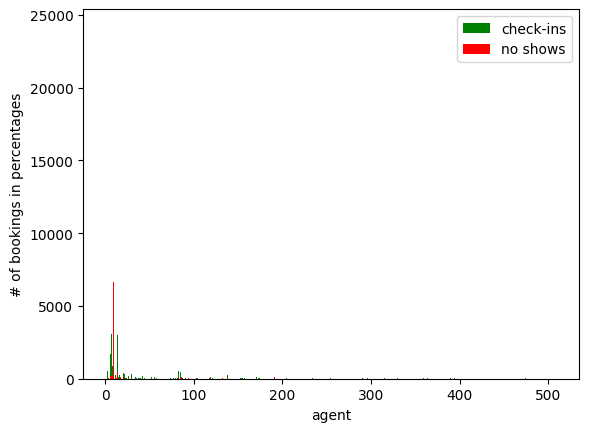

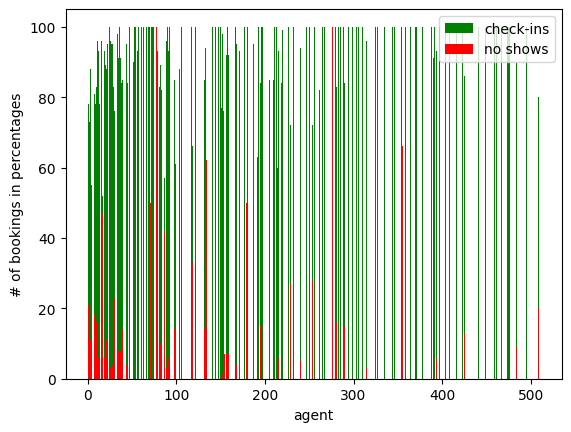

[ 89  78  78  81  78  96  93  86  95  87  95  52  83  95  94  88  89  93
  94  84  98  91 100 100  96  85  88 100 100 100  76 100  90  93  95  96
 100  82 100 100 100  83  93  96  92  84  84  93  57  66  79  37  88  80
  85  40  92  50  93  86  76   0  77  91  73  84  92  76  93  98  63  49
  95  93   0  92  94  83  94  68  85   0  60  93  90  82  33  99  88  87
  93  72  85  95  84  91  95   0  72  86  96  90  84  93  80  87  85   0
  55  50   0 100  66 100  89  83 100 100  61 100 100   0 100 100 100  86
 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100
 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100
 100 100  50 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100
 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100
 100 100 100 100 100 100 100 100 100 100 100]
[ 10  21  21  18  21   3   6  13   4  12   4  47  16   4   5  11  10   6
   5  15   1   8   0   0   3  14  11   0   0   0  23   0  10   6   4   3
   0 

In [2250]:
feature_str = "agent"

feature_i = df_hotel[feature_str].unique()
print(feature_i)
print(len(feature_i))

feature_i_Counts_0 = np.arange(len(feature_i))
feature_i_Counts_1 = np.arange(len(feature_i))

i=0
for v in feature_i:
    df_feature_i = df_hotel[df_hotel[feature_str] == v]
    #print("For day of month: ", day)
    #print(v)
    counts = df_feature_i["is_canceled"].value_counts()
    #print(counts)
    if(len(counts) == 1):
        if counts.index[0] == 0:
            feature_i_Counts_0[i] = counts[counts.index[0]]
            feature_i_Counts_1[i] = 0
            
        if counts.index[0] == 1:
            feature_i_Counts_1[i] = counts[counts.index[0]]
            feature_i_Counts_0[i] = 0   
    else:
        feature_i_Counts_0[i] = counts[0]
        feature_i_Counts_1[i] = counts[1]
    #print(day_of_month_Counts_0[i], day_of_month_Counts_1[i])
    i = i + 1
    
plt.bar(feature_i, feature_i_Counts_0, color="g", label="check-ins")
plt.bar(feature_i+0.01, feature_i_Counts_1, color="r", label="no shows")
plt.xlabel(feature_str)
plt.ylabel("# of bookings in percentages")
plt.legend()
plt.show()

agent_honored_only = []
agent_canceled_only = []

i=0
for v in feature_i:
    df_feature_i = df_hotel[df_hotel[feature_str] == v]
    #print("For day of month: ", day)
    #print(v)
    counts = df_feature_i["is_canceled"].value_counts()
    #print(counts)
    if(len(counts) == 1):
        if counts.index[0] == 0:
            feature_i_Counts_0[i] = 100
            feature_i_Counts_1[i] = 0
            
        if counts.index[0] == 1:
            feature_i_Counts_1[i] = 100
            feature_i_Counts_0[i] = 0   
    else:
        feature_i_Counts_0[i] = (counts[0]/(counts[0]+counts[1])) * 100
        feature_i_Counts_1[i] = (counts[1]/(counts[0]+counts[1])) * 100
    #print(day_of_month_Counts_0[i], day_of_month_Counts_1[i])
    i = i + 1
    
    
plt.bar(feature_i, feature_i_Counts_0, color="g", label="check-ins")
plt.bar(feature_i+0.01, feature_i_Counts_1, color="r", label="no shows")
plt.xlabel(feature_str)
plt.ylabel("# of bookings in percentages")
plt.legend()
plt.show()

print(feature_i_Counts_0)
print(feature_i_Counts_1)

53
arrival_date_week_number  is_canceled
1                         0              440
                          1              129
2                         0              448
                          1               99
3                         0              488
                                        ... 
51                        1               79
52                        0              412
                          1               95
53                        0              692
                          1              183
Length: 106, dtype: int64
[ 440  448  488  527  527  589  792  865  808  899  902  911  945  867
  995  876 1003  989  960 1018 1158  964 1014 1028  959 1045 1120 1077
 1066 1118 1016 1157 1305 1262 1022  851  917 1101 1098  925 1072 1058
  812  979  646  595  703  712  602  540  329  412  692] [129  99 125 117 162 152 206 223 212 304 179 171 178 173 221 243 217 240
 182 223 241 195 198 255 186 143 207 240 274 281 177 247 248 205 170 152
 159 208 159 201 181 2

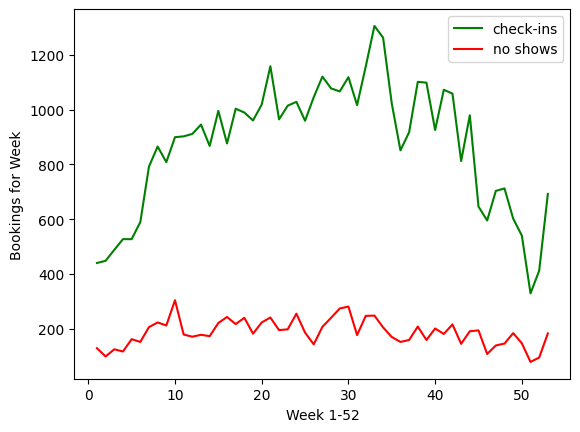

[77.32864675 81.90127971 79.60848287 81.83229814 76.48766328 79.48717949
 79.35871743 79.50367647 79.21568627 74.72984206 83.44125809 84.19593346
 84.14959929 83.36538462 81.82565789 78.28418231 82.21311475 80.4719284
 84.06304729 82.03062047 82.77340958 83.17515099 83.66336634 80.12470772
 83.75545852 87.96296296 84.4009043  81.77676538 79.55223881 79.91422445
 85.16345348 82.40740741 84.03090792 86.0259032  85.73825503 84.84546361
 85.22304833 84.11000764 87.35083532 82.14920071 85.55466879 83.0455259
 84.84848485 83.67521368 76.9047619  84.63726885 83.49168646 82.98368298
 76.59033079 78.60262009 80.6372549  81.26232742 79.08571429] [22.67135325 18.09872029 20.39151713 18.16770186 23.51233672 20.51282051
 20.64128257 20.49632353 20.78431373 25.27015794 16.55874191 15.80406654
 15.85040071 16.63461538 18.17434211 21.71581769 17.78688525 19.5280716
 15.93695271 17.96937953 17.22659042 16.82484901 16.33663366 19.87529228
 16.24454148 12.03703704 15.5990957  18.22323462 20.44776119 20.0

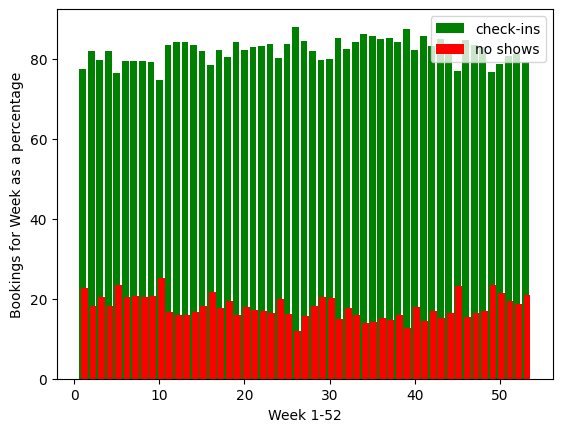

In [2251]:
weeks = df_hotel["arrival_date_week_number"].unique()
weeks = np.sort(weeks)
weeks

print(len(weeks))

w_is_canceled_0 = np.arange(1, len(weeks)+1)
w_is_canceled_1 = np.arange(1, len(weeks)+1)


w_is_canceled_0_p = np.arange(1, len(weeks)+1, dtype=float)
w_is_canceled_1_p = np.arange(1, len(weeks)+1, dtype=float)

#print(w_is_canceled_0, w_is_canceled_1)

#print(weeks)


weeks_counts = df_hotel[["arrival_date_week_number", "is_canceled"]].value_counts().sort_index()
print(weeks_counts)

i=0

for w in weeks:
    w_is_canceled_0[i] = weeks_counts[w][0]
    w_is_canceled_1[i] = weeks_counts[w][1]
    i = i+1
    
print(w_is_canceled_0, w_is_canceled_1)
width = 0.2
plt.plot(weeks, w_is_canceled_0, color='g', label="check-ins")
plt.plot(weeks, w_is_canceled_1, color='r', label="no shows")
plt.xlabel("Week 1-52")
plt.ylabel("Bookings for Week")
plt.legend()
plt.show()
    
i=0
for w in weeks:
    w_is_canceled_0_p[i] = ((weeks_counts[w][0])/(weeks_counts[w][0]+weeks_counts[w][1]))*100
    w_is_canceled_1_p[i] = ((weeks_counts[w][1])/(weeks_counts[w][0]+weeks_counts[w][1]))*100
    i = i+1

print(w_is_canceled_0_p, w_is_canceled_1_p)
width = 0.2
plt.bar(weeks, w_is_canceled_0_p, color='g', label="check-ins")
plt.bar(weeks+width, w_is_canceled_1_p, color='r', label="no shows")
plt.xlabel("Week 1-52")
plt.ylabel("Bookings for Week as a percentage")
plt.legend()
plt.show()

# Data Transformation

In [2252]:
# delete instances for months Jan - March, Nov-Dec
for m in [1, 2, 3, 11, 12]:
    df_hotel = df_hotel[df_hotel['arrival_date_month_#'] != m]
    
print(len(df_hotel))

print(df_hotel['is_canceled'].value_counts())

for dt in ["Non Refund"]:
    print(len(df_hotel), df_hotel["is_canceled"].value_counts())
    df_hotel = df_hotel[df_hotel['deposit_type'] != dt]
    print(len(df_hotel), df_hotel["is_canceled"].value_counts())
    


38081
0    31732
1     6349
Name: is_canceled, dtype: int64
38081 0    31732
1     6349
Name: is_canceled, dtype: int64
38081 0    31732
1     6349
Name: is_canceled, dtype: int64


DO THIS PART OF THE DATA ANALYSIS LATER

In [2253]:
"""

month = df_hotel['arrival_date_month'].unique()
week_number = df_hotel['arrival_date_week_number'].unique()
print(np.sort(month))
print(np.sort(week_number))

week_map = {}
for M in [4, 5]:
    data_M = pd.DataFrame()
    print("Month:", M)
    data_M = df_hotel[df_hotel['arrival_date_month_#'] == M]
    #print(data_M.head())
    weeks = np.sort(data_M['arrival_date_week_number'].unique())   # weeks numbered from 1....52
    print(weeks)
    i = 0
    for w in weeks:
        df_ = df_hotel['arrival_date_week_number'].replace(i+1, w)
        
df_.head()

#df_[df_['arrival_date_month_#'] == 4].head()

"""

'\n\nmonth = df_hotel[\'arrival_date_month\'].unique()\nweek_number = df_hotel[\'arrival_date_week_number\'].unique()\nprint(np.sort(month))\nprint(np.sort(week_number))\n\nweek_map = {}\nfor M in [4, 5]:\n    data_M = pd.DataFrame()\n    print("Month:", M)\n    data_M = df_hotel[df_hotel[\'arrival_date_month_#\'] == M]\n    #print(data_M.head())\n    weeks = np.sort(data_M[\'arrival_date_week_number\'].unique())   # weeks numbered from 1....52\n    print(weeks)\n    i = 0\n    for w in weeks:\n        df_ = df_hotel[\'arrival_date_week_number\'].replace(i+1, w)\n        \ndf_.head()\n\n#df_[df_[\'arrival_date_month_#\'] == 4].head()\n\n'

In [2254]:
df_hotel.info()
df_hotel.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38081 entries, 40060 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype          
---  ------                          --------------  -----          
 0   hotel                           38081 non-null  object         
 1   is_canceled                     38081 non-null  int64          
 2   lead_time                       38081 non-null  int64          
 3   arrival_date_year               38081 non-null  int64          
 4   arrival_date_month              38081 non-null  object         
 5   arrival_date_week_number        38081 non-null  int64          
 6   arrival_date_day_of_month       38081 non-null  int64          
 7   stays_in_weekend_nights         38081 non-null  int64          
 8   stays_in_week_nights            38081 non-null  int64          
 9   adults                          38081 non-null  int64          
 10  children                        38081 non-null  float

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,arrival_date_month_#,diff_reservation_arrival,diff_reservation_arrival_int
count,38081.000000,38081.000000,38081.000000,38081.000000,38081.000000,38081.000000,38081.000000,38081.000000,38081.000000,38081.000000,...,38081.000000,38081.000000,38081.000000,38081.000000,38081.000000,38081.000000,38081.000000,38081.000000,38081,38081.000000
mean,0.166724,93.611722,2016.147318,29.205982,15.787716,0.815919,2.100943,1.867545,0.110055,0.005882,...,0.155432,0.237704,25.330138,2.561382,115.259576,0.033114,0.718915,7.021796,-1 days +09:14:41.731046979,-0.614795
std,0.372734,97.139184,0.704904,8.712926,8.701139,0.865625,1.401829,0.520229,0.408155,0.088564,...,1.926260,0.685311,54.299328,20.482187,41.501731,0.179814,0.833346,1.949897,6 days 12:05:00.885556882,6.503482
min,0.000000,0.000000,2015.000000,13.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-57 days +00:00:00,-57.000000
25%,0.000000,16.000000,2016.000000,22.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,9.000000,0.000000,90.000000,0.000000,0.000000,5.000000,-3 days +00:00:00,-3.000000
50%,0.000000,63.000000,2016.000000,29.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,9.000000,0.000000,111.350000,0.000000,1.000000,7.000000,-2 days +00:00:00,-2.000000
75%,0.000000,142.000000,2017.000000,37.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,14.000000,0.000000,136.800000,0.000000,1.000000,9.000000,-1 days +00:00:00,-1.000000
max,1.000000,518.000000,2017.000000,45.000000,31.000000,16.000000,41.000000,4.000000,3.000000,9.000000,...,72.000000,20.000000,509.000000,379.000000,510.000000,3.000000,5.000000,10.000000,30 days 00:00:00,30.000000


In [2255]:
print(df_hotel['is_canceled'].value_counts())
X = df_hotel[df_hotel.columns.drop(['arrival_date_month_#', 'hotel', 'is_canceled', 'reservation_status_date', 'arrival_date', 'reservation_status_date_new', 'diff_reservation_arrival', 'diff_reservation_arrival_int', 'reservation_status', 'deposit_type'])]

Y = df_hotel['is_canceled']
X.info()

categorical = ["arrival_date_year", "arrival_date_month", "arrival_date_week_number", "arrival_date_day_of_month", "meal", "is_repeated_guest", "country", "market_segment", "distribution_channel", "reserved_room_type", "assigned_room_type", "agent", "customer_type"]

print(X.shape)
one_hot_encoded_X = pd.get_dummies(X, columns = categorical)
one_hot_encoded_X.info()
print("After one hot encoding: ", one_hot_encoded_X.shape)
one_hot_encoded_X.columns

one_hot_encoded_features = one_hot_encoded_X.drop(numeric_features, axis=1).columns
one_hot_encoded_features



0    31732
1     6349
Name: is_canceled, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 38081 entries, 40060 to 119389
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   lead_time                       38081 non-null  int64  
 1   arrival_date_year               38081 non-null  int64  
 2   arrival_date_month              38081 non-null  object 
 3   arrival_date_week_number        38081 non-null  int64  
 4   arrival_date_day_of_month       38081 non-null  int64  
 5   stays_in_weekend_nights         38081 non-null  int64  
 6   stays_in_week_nights            38081 non-null  int64  
 7   adults                          38081 non-null  int64  
 8   children                        38081 non-null  float64
 9   babies                          38081 non-null  int64  
 10  meal                            38081 non-null  object 
 11  country                         38

Index(['arrival_date_year_2015', 'arrival_date_year_2016',
       'arrival_date_year_2017', 'arrival_date_month_April',
       'arrival_date_month_August', 'arrival_date_month_July',
       'arrival_date_month_June', 'arrival_date_month_May',
       'arrival_date_month_October', 'arrival_date_month_September',
       ...
       'agent_475.0', 'agent_476.0', 'agent_480.0', 'agent_484.0',
       'agent_495.0', 'agent_509.0', 'customer_type_Contract',
       'customer_type_Group', 'customer_type_Transient',
       'customer_type_Transient-Party'],
      dtype='object', length=431)

In [2256]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(one_hot_encoded_X, Y, test_size = 0.20, random_state=42)
print(y_train.value_counts())

0    25399
1     5065
Name: is_canceled, dtype: int64


In [2257]:
sm = SMOTE(sampling_strategy=0.8, random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [2148]:
print(y_train.value_counts())

0    25399
1    20319
Name: is_canceled, dtype: int64


In [2149]:
X_train.columns

Index(['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
       'adults', 'children', 'babies', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list',
       ...
       'agent_475.0', 'agent_476.0', 'agent_480.0', 'agent_484.0',
       'agent_495.0', 'agent_509.0', 'customer_type_Contract',
       'customer_type_Group', 'customer_type_Transient',
       'customer_type_Transient-Party'],
      dtype='object', length=444)

In [2150]:
# Normalize numeric variables

In [2151]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

# Define the hyperparameter grid to search over
C = [0.001, 0.01, 0.1, 1, 10, 100]
penalty = ['l1', 'l2']
param_grid = {'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}

# Create a logistic regression model
model = LogisticRegression(max_iter=4000)

# Use grid search to find the best combination of hyperparameters using custom scoring
grid = GridSearchCV(model, param_grid=param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding score
best_params = grid.best_params_
best_score = grid.best_score_

# Train a logistic regression model on the training set using the best hyperparameters
model = LogisticRegression(**best_params)
model.fit(X_train, y_train)

# Get the predicted probabilities for the testing set
y_pred_prob = model.predict_proba(X_test)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [2152]:
y_pred_prob_LR=y_pred_prob[:, 1]
y_pred_prob_LR

print(y_pred_prob_LR.shape)
print(y_test.shape)

(7617,)
(7617,)


In [2153]:
# Convert predicted probabilities to predicted class labels based on the threshold
from sklearn.metrics import roc_auc_score
# Find the accuracy of the model
from sklearn.metrics import accuracy_score
auc = roc_auc_score(y_test, y_pred_prob_LR)

print("AUC Score:", auc)

AUC Score: 0.820450830417538


In [2154]:
print(type(X_test), type(y_test), type(y_pred_prob_LR))
print(X_test.shape, y_test.shape, y_pred_prob_LR.shape)
y_prob = pd.DataFrame(y_pred_prob_LR, columns=["probabilities"])
print(y_prob)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'> <class 'numpy.ndarray'>
(7617, 444) (7617,) (7617,)
      probabilities
0          0.018242
1          0.035613
2          0.066620
3          0.612990
4          0.193445
...             ...
7612       0.174898
7613       0.104105
7614       0.017204
7615       0.017581
7616       0.404552

[7617 rows x 1 columns]


# Decision Logic

In [1932]:
#for c in X_test.columns:
    #print(c)
    
week_features = []

for i in range(13, 46):
    week_features.append("arrival_date_week_number_"+str(i))
    
print(week_features)

X_test["booking_week"] = X_test[week_features].idxmax(axis=1)
print(X_test["booking_week"])
X_test["booking_week"].value_counts()

['arrival_date_week_number_13', 'arrival_date_week_number_14', 'arrival_date_week_number_15', 'arrival_date_week_number_16', 'arrival_date_week_number_17', 'arrival_date_week_number_18', 'arrival_date_week_number_19', 'arrival_date_week_number_20', 'arrival_date_week_number_21', 'arrival_date_week_number_22', 'arrival_date_week_number_23', 'arrival_date_week_number_24', 'arrival_date_week_number_25', 'arrival_date_week_number_26', 'arrival_date_week_number_27', 'arrival_date_week_number_28', 'arrival_date_week_number_29', 'arrival_date_week_number_30', 'arrival_date_week_number_31', 'arrival_date_week_number_32', 'arrival_date_week_number_33', 'arrival_date_week_number_34', 'arrival_date_week_number_35', 'arrival_date_week_number_36', 'arrival_date_week_number_37', 'arrival_date_week_number_38', 'arrival_date_week_number_39', 'arrival_date_week_number_40', 'arrival_date_week_number_41', 'arrival_date_week_number_42', 'arrival_date_week_number_43', 'arrival_date_week_number_44', 'arriva

arrival_date_week_number_33    330
arrival_date_week_number_34    282
arrival_date_week_number_21    282
arrival_date_week_number_27    280
arrival_date_week_number_28    277
arrival_date_week_number_39    273
arrival_date_week_number_30    273
arrival_date_week_number_32    271
arrival_date_week_number_41    254
arrival_date_week_number_31    253
arrival_date_week_number_42    251
arrival_date_week_number_29    250
arrival_date_week_number_20    247
arrival_date_week_number_26    245
arrival_date_week_number_17    245
arrival_date_week_number_18    245
arrival_date_week_number_38    245
arrival_date_week_number_24    245
arrival_date_week_number_35    241
arrival_date_week_number_15    237
arrival_date_week_number_23    235
arrival_date_week_number_44    233
arrival_date_week_number_19    228
arrival_date_week_number_22    228
arrival_date_week_number_25    225
arrival_date_week_number_40    224
arrival_date_week_number_16    222
arrival_date_week_number_37    216
arrival_date_week_nu

In [1937]:
X_ = X_test.set_index(np.arange(0, 7617))
X_


,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,...,agent_476.0,agent_480.0,agent_484.0,agent_495.0,agent_509.0,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,booking_week
0,94,0,4,2,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,arrival_date_week_number_15
1,59,2,4,2,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,arrival_date_week_number_29
2,85,0,2,2,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,arrival_date_week_number_22
3,111,2,5,3,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,arrival_date_week_number_31
4,213,1,3,1,0.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,arrival_date_week_number_35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7612,504,2,1,2,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,arrival_date_week_number_32
7613,32,0,1,2,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,arrival_date_week_number_24
7614,135,1,3,2,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,arrival_date_week_number_25
7615,335,0,3,1,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,arrival_date_week_number_42


In [1942]:
y_ = pd.DataFrame(y_test).set_index(np.arange(0, 7617))
y_

,is_canceled
0,0
1,0
2,1
3,1
4,0
...,...
7612,0
7613,0
7614,0
7615,0


In [1945]:
print(type(y_prob), type(X_), type(y_))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [1972]:
print(y_prob)
print(y_)

      probabilities
0          0.018242
1          0.035613
2          0.066620
3          0.612990
4          0.193445
...             ...
7612       0.174898
7613       0.104105
7614       0.017204
7615       0.017581
7616       0.404552

[7617 rows x 1 columns]
      is_canceled
0               0
1               0
2               1
3               1
4               0
...           ...
7612            0
7613            0
7614            0
7615            0
7616            1

[7617 rows x 1 columns]


In [2013]:
booking_week = "arrival_date_week_number_"+str(33)
print(booking_week)

idx = X_.index[X_['booking_week'] == booking_week]
print(len(idx))

#print(X_.iloc[idx])
print(y_prob.iloc[idx])
print(y_.iloc[idx].sum())

y_prob_week_33 = y_prob.iloc[idx]
y_week_33 = y_.iloc[idx]
X_week_33 = X_.iloc[idx]

print(y_prob_week_33, y_week_33)
print(len(y_prob_week_33), len(y_week_33), len(X_week_33))

total_demand = len(idx)
actual_demand = total_demand - y_.iloc[idx].sum()[0]


print(total_demand, actual_demand)

arrival_date_week_number_33
330
      probabilities
65         0.266535
77         0.596355
78         0.218955
83         0.716285
88         0.464057
...             ...
7515       0.185755
7559       0.005991
7592       0.003388
7600       0.464302
7609       0.105354

[330 rows x 1 columns]
is_canceled    53
dtype: int64
      probabilities
65         0.266535
77         0.596355
78         0.218955
83         0.716285
88         0.464057
...             ...
7515       0.185755
7559       0.005991
7592       0.003388
7600       0.464302
7609       0.105354

[330 rows x 1 columns]       is_canceled
65              0
77              1
78              0
83              0
88              1
...           ...
7515            0
7559            0
7592            0
7600            0
7609            0

[330 rows x 1 columns]
330 330 330
330 277


In [2015]:
y_week_33_ = pd.DataFrame(y_week_33).set_index(np.arange(0, 330))
y_prob_week_33_ = pd.DataFrame(y_prob_week_33).set_index(np.arange(0, 330))
X_week_33_ = pd.DataFrame(X_week_33).set_index(np.arange(0, 330))

print(y_week_33_)
print(y_prob_week_33_)

     is_canceled
0              0
1              1
2              0
3              0
4              1
..           ...
325            0
326            0
327            0
328            0
329            0

[330 rows x 1 columns]
     probabilities
0         0.266535
1         0.596355
2         0.218955
3         0.716285
4         0.464057
..             ...
325       0.185755
326       0.005991
327       0.003388
328       0.464302
329       0.105354

[330 rows x 1 columns]


In [2033]:
print(X_week_33_, y_week_33_, y_prob_week_33_)

     lead_time  stays_in_weekend_nights  stays_in_week_nights  adults  \
0          209                        1                     4       2   
1          116                        2                     3       2   
2           88                        0                     2       2   
3           53                        0                     2       2   
4            0                        0                     2       2   
..         ...                      ...                   ...     ...   
325        129                        0                     4       2   
326         21                        0                     1       2   
327         71                        0                     3       3   
328          0                        0                     1       2   
329         39                        0                     2       1   

     children  babies  previous_cancellations  previous_bookings_not_canceled  \
0         0.0       0                     

In [2042]:
print(X_week_33_.iloc[0], y_week_33_.iloc[0], y_prob_week_33_.iloc[0])
print(X_week_33_.iloc[1], y_week_33_.iloc[1], y_prob_week_33_.iloc[1])
print(X_week_33_.iloc[2], y_week_33_.iloc[2], y_prob_week_33_.iloc[2])
print(X_week_33_.iloc[3], y_week_33_.iloc[3], y_prob_week_33_.iloc[3])
print(X_week_33_.iloc[4], y_week_33_.iloc[4], y_prob_week_33_.iloc[4])

lead_time                                                209
stays_in_weekend_nights                                    1
stays_in_week_nights                                       4
adults                                                     2
children                                                 0.0
                                            ...             
customer_type_Transient                                    1
customer_type_Transient-Party                              0
booking_week                     arrival_date_week_number_33
opportunity_cost                                       103.5
overbooking_cost                                       133.5
Name: 0, Length: 447, dtype: object is_canceled    0
Name: 0, dtype: int64 probabilities    0.266535
Name: 0, dtype: float64
lead_time                                                116
stays_in_weekend_nights                                    2
stays_in_week_nights                                       3
adults               

In [2027]:
C = 300

X_week_33_["opportunity_cost"] = X_week_33_["adr"]
print(X_week_33_["opportunity_cost"])

X_week_33_["overbooking_cost"] = (X_week_33_["adr"]) + 30%(X_week_33_["adr"])
print(X_week_33_["overbooking_cost"])

0      103.5
1      125.0
2       76.5
3      160.0
4      109.0
       ...  
325    125.0
326     75.0
327     96.9
328     89.5
329     87.0
Name: opportunity_cost, Length: 330, dtype: float64
0      133.5
1      155.0
2      106.5
3      190.0
4      139.0
       ...  
325    155.0
326    105.0
327    126.9
328    119.5
329    117.0
Name: overbooking_cost, Length: 330, dtype: float64


In [2090]:
#print(X_week_33_, y_week_33_, y_prob_week_33_)
#Calculate P(m, k) where m = overbooking limit and k = demand
import math
def expected_value_m_k_underbooked(X_week_num_, y_prob_week_num_, arrivals, m):
    
    V_X = 0
    V_Y = 0
    
    for k in range(0, arrivals):
        p_x = 1 - y_prob_week_num_.iloc[k]
        r_x = X_week_num_['adr'].iloc[k]
        V_X = V_X + (p_x * r_x)
        
    print("Value 1:", V_X)
    
    for k in range(arrivals, m):
        p_y = y_prob_week_num_.iloc[k]
        r_y = X_week_num_['opportunity_cost'].iloc[k]
        V_Y = V_Y + (p_y * r_y)
        
    print("Value 2:", V_Y)
    
    print("Value: ", V_X - V_Y)
        
    return (V_X - V_Y)

In [2093]:
C = 300

#expected_ev = expected_value_m_k(X_week_33_, y_prob_week_33_, 0, C)
#print("Expected ev", expected_ev[0])

ev = []


for k in range(0, C-1):
    expected_ev = expected_value_m_k_underbooked(X_week_33_, y_prob_week_33_, k, C)
    ev.append(expected_ev[0])
    
print(ev)

Value 1: 0
Value 2: probabilities    7615.990261
dtype: float64
Value:  probabilities   -7615.990261
dtype: float64
Value 1: probabilities    75.913642
Name: 0, dtype: float64
Value 2: probabilities    7588.403903
dtype: float64
Value:  probabilities   -7512.490261
dtype: float64
Value 1: probabilities    126.369304
dtype: float64
Value 2: probabilities    7513.859565
dtype: float64
Value:  probabilities   -7387.490261
dtype: float64
Value 1: probabilities    186.119261
dtype: float64
Value 2: probabilities    7497.109522
dtype: float64
Value:  probabilities   -7310.990261
dtype: float64
Value 1: probabilities    231.513639
dtype: float64
Value 2: probabilities    7382.5039
dtype: float64
Value:  probabilities   -7150.990261
dtype: float64
Value 1: probabilities    289.931423
dtype: float64
Value 2: probabilities    7331.921684
dtype: float64
Value:  probabilities   -7041.990261
dtype: float64
Value 1: probabilities    450.612229
dtype: float64
Value 2: probabilities    7297.602489
dty

Value 2: probabilities    6225.212445
dtype: float64
Value:  probabilities   -1504.160261
dtype: float64
Value 1: probabilities    4811.489673
dtype: float64
Value 2: probabilities    6115.649933
dtype: float64
Value:  probabilities   -1304.160261
dtype: float64
Value 1: probabilities    4917.816046
dtype: float64
Value 2: probabilities    6100.976307
dtype: float64
Value:  probabilities   -1183.160261
dtype: float64
Value 1: probabilities    4958.245755
dtype: float64
Value 2: probabilities    6026.406016
dtype: float64
Value:  probabilities   -1068.160261
dtype: float64
Value 1: probabilities    5044.528346
dtype: float64
Value 2: probabilities    5966.688606
dtype: float64
Value:  probabilities   -922.160261
dtype: float64
Value 1: probabilities    5169.805379
dtype: float64
Value 2: probabilities    5966.50564
dtype: float64
Value:  probabilities   -796.700261
dtype: float64
Value 1: probabilities    5286.763217
dtype: float64
Value 2: probabilities    5944.463478
dtype: float64
Va

Value 1: probabilities    10335.923676
dtype: float64
Value 2: probabilities    4591.303937
dtype: float64
Value:  probabilities    5744.619739
dtype: float64
Value 1: probabilities    10468.703804
dtype: float64
Value 2: probabilities    4575.584065
dtype: float64
Value:  probabilities    5893.119739
dtype: float64
Value 1: probabilities    10654.750936
dtype: float64
Value 2: probabilities    4542.631197
dtype: float64
Value:  probabilities    6112.119739
dtype: float64
Value 1: probabilities    10810.443476
dtype: float64
Value 2: probabilities    4542.623737
dtype: float64
Value:  probabilities    6267.819739
dtype: float64
Value 1: probabilities    10942.054098
dtype: float64
Value 2: probabilities    4535.234358
dtype: float64
Value:  probabilities    6406.819739
dtype: float64
Value 1: probabilities    11076.997405
dtype: float64
Value 2: probabilities    4504.177666
dtype: float64
Value:  probabilities    6572.819739
dtype: float64
Value 1: probabilities    11183.049233
dtype: 

Value 1: probabilities    15946.694005
dtype: float64
Value 2: probabilities    3390.944265
dtype: float64
Value:  probabilities    12555.749739
dtype: float64
Value 1: probabilities    16031.220628
dtype: float64
Value 2: probabilities    3286.470888
dtype: float64
Value:  probabilities    12744.749739
dtype: float64
Value 1: probabilities    16176.89948
dtype: float64
Value 2: probabilities    3280.149741
dtype: float64
Value:  probabilities    12896.749739
dtype: float64
Value 1: probabilities    16299.001569
dtype: float64
Value 2: probabilities    3249.25183
dtype: float64
Value:  probabilities    13049.749739
dtype: float64
Value 1: probabilities    16306.636453
dtype: float64
Value 2: probabilities    3244.886714
dtype: float64
Value:  probabilities    13061.749739
dtype: float64
Value 1: probabilities    16409.783638
dtype: float64
Value 2: probabilities    3178.033898
dtype: float64
Value:  probabilities    13231.749739
dtype: float64
Value 1: probabilities    16528.419149
dty

Value 1: probabilities    21217.872425
dtype: float64
Value 2: probabilities    1977.312686
dtype: float64
Value:  probabilities    19240.559739
dtype: float64
Value 1: probabilities    21292.267356
dtype: float64
Value 2: probabilities    1955.087617
dtype: float64
Value:  probabilities    19337.179739
dtype: float64
Value 1: probabilities    21371.993274
dtype: float64
Value 2: probabilities    1954.713535
dtype: float64
Value:  probabilities    19417.279739
dtype: float64
Value 1: probabilities    21540.467964
dtype: float64
Value 2: probabilities    1904.758224
dtype: float64
Value:  probabilities    19635.709739
dtype: float64
Value 1: probabilities    21688.80427
dtype: float64
Value 2: probabilities    1858.09453
dtype: float64
Value:  probabilities    19830.709739
dtype: float64
Value 1: probabilities    21767.266296
dtype: float64
Value 2: probabilities    1837.556557
dtype: float64
Value:  probabilities    19929.709739
dtype: float64
Value 1: probabilities    21954.916723
dty

Value 1: probabilities    26973.070367
dtype: float64
Value 2: probabilities    699.970628
dtype: float64
Value:  probabilities    26273.099739
dtype: float64
Value 1: probabilities    27043.634286
dtype: float64
Value 2: probabilities    697.534547
dtype: float64
Value:  probabilities    26346.099739
dtype: float64
Value 1: probabilities    27139.592784
dtype: float64
Value 2: probabilities    694.493045
dtype: float64
Value:  probabilities    26445.099739
dtype: float64
Value 1: probabilities    27211.546088
dtype: float64
Value 2: probabilities    694.196349
dtype: float64
Value:  probabilities    26517.349739
dtype: float64
Value 1: probabilities    27334.843961
dtype: float64
Value 2: probabilities    694.194222
dtype: float64
Value:  probabilities    26640.649739
dtype: float64
Value 1: probabilities    27438.059182
dtype: float64
Value 2: probabilities    683.409443
dtype: float64
Value:  probabilities    26754.649739
dtype: float64
Value 1: probabilities    27569.477348
dtype: 

In [2094]:
print(max(ev))
print(len(ev))

#28831.75973929873
# 300

28735.75973929873
299


In [2099]:
import math
def expected_value_m_k_overbooked(X_week_num_, y_prob_week_num_, arrivals):
    
    V_X = 0
    V_Y = 0
    
    for k in range(0, C):
        p_x = 1 - y_prob_week_num_.iloc[k]
        r_x = X_week_num_['adr'].iloc[k]
        V_X = V_X + (p_x * r_x)
        
    print("Value 1:", V_X)
    
    c = 299
    
    for k in range(0, arrivals-c):
        p_y = 1 - y_prob_week_num_.iloc[c+k]
        r_y = X_week_num_['overbooking_cost'].iloc[c+k]
        V_Y = V_Y + (p_y * r_y)
        
    print("Value 2:", V_Y)
    
    print("Value: ", V_X - V_Y)
        
    return (V_X - V_Y)

In [2102]:
C = 300
#print(expected_value_m_k_overbooked(X_week_33_, y_prob_week_33_, 300))
#print(expected_value_m_k_overbooked(X_week_33_, y_prob_week_33_, 301))
#print(expected_value_m_k_overbooked(X_week_33_, y_prob_week_33_, 302))
ev_ob = []

ob=300

for ob in range(300, 330):
    expected_ev_ob = expected_value_m_k_overbooked(X_week_33_, y_prob_week_33_, ob)
    ev_ob.append(expected_ev_ob[0])
    


Value 1: probabilities    28964.259739
dtype: float64
Value 2: probabilities    114.171462
Name: 299, dtype: float64
Value:  probabilities    28850.088277
dtype: float64
Value 1: probabilities    28964.259739
dtype: float64
Value 2: probabilities    289.623085
dtype: float64
Value:  probabilities    28674.636655
dtype: float64
Value 1: probabilities    28964.259739
dtype: float64
Value 2: probabilities    494.282466
dtype: float64
Value:  probabilities    28469.977274
dtype: float64
Value 1: probabilities    28964.259739
dtype: float64
Value 2: probabilities    594.508826
dtype: float64
Value:  probabilities    28369.750914
dtype: float64
Value 1: probabilities    28964.259739
dtype: float64
Value 2: probabilities    738.09329
dtype: float64
Value:  probabilities    28226.166449
dtype: float64
Value 1: probabilities    28964.259739
dtype: float64
Value 2: probabilities    806.789315
dtype: float64
Value:  probabilities    28157.470424
dtype: float64
Value 1: probabilities    28964.2597

In [2104]:
print(max(ev_ob))
print(len(ev_ob))

28850.088277366947
30
